# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.53453           0.77061          0.00561              0.00000   
1            0.53453           0.10058          0.37616              0.00005   
2            0.53453           0.23016          0.23842              0.02231   
3            0.53453           0.85944          0.10949              0.00000   
4            0.53453           0.23016          0.61636              0.02235   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75719                0.00000                   0.00010   
1            0.76752                0.00080                   0.00133   
2            0.76718                0.00198                   0.00791   
3            0.00204                0.00078                   0.00120   
4            0.76848                0.00198                   0.00766   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00022            0.00742                0.00000  ...   
1               0.00239            0.00742                0.00012  ...   
2               0.02106            0.00742                0.02119  ...   
3               0.00282            0.00218                0.00000  ...   
4               0.02019            0.00742                0.01943  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0           0                       0       tcp     none          SH   
1        1915                       6       tcp      ssl          SF   
2      290589                     160       tcp      ssl          SF   
3           0                       0       udp      dns          S0   
4      266707                     152       tcp      ssl          SF   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn         resp_443              No            No   
3  orig_well_known  resp_well_known              No            No   
4  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0   2017-07-04T13:05:10.09719Z  
1  2017-07-04T13:16:16.943791Z  
2  2017-07-04T13:12:09.069054Z  
3  2017-07-04T13:08:17.049633Z  
4  2017-07-04T13:23:29.209443Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.53453           0.85944          0.77728              0.00022   
1            0.53453           0.85944          0.35974              0.00002   
2            0.00000           0.85944          0.44102              0.00460   
3            0.53453           0.85944          0.01200              0.00003   
4            0.53453           0.85944          0.86823              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.85888                0.00007                   0.00014   
1            0.99165                0.00011                   0.00017   
2            0.91379                0.00016                   0.00084   
3            0.89566                0.00010                   0.00016   
4            0.75398                0.00010                   0.00017   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00043            0.00074                0.00004  ...   
1               0.00043            0.00074                0.00003  ...   
2               0.00239            0.00019                0.00001  ...   
3               0.00043            0.00074                0.00002  ...   
4               0.00043            0.00074                0.00002  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         600                       2       udp      dns          SF   
1         400                       2       udp      dns          SF   
2        1056                      17       tcp      ftp          SF   
3         330                       2       udp      dns          SF   
4         268                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_21             Yes           Yes   
3  orig_reg_or_dyn     resp_53              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-04T13:28:18.804956Z  
1  2017-07-04T13:15:47.396504Z  
2  2017-07-04T13:18:13.667009Z  
3  2017-07-04T13:05:21.603053Z  
4  2017-07-04T13:31:02.474762Z  

[5 rows x 300 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21568 rows and 300 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        21568.00000       21568.00000      21568.00000   
mean             0.50931           0.73600          0.43839   
std              0.11341           0.23925          0.29346   
min              0.00000           0.00000          0.00000   
25%              0.53453           0.77061          0.17921   
50%              0.53453           0.85944          0.37603   
75%              0.53453           0.85944          0.67348   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          21568.00000        21568.00000            21568.00000   
mean               0.00928            0.73425                0.00079   
std                0.02891            0.27208                0.00981   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.68920                0.00007   
50%                0.00003            0.81880                0.00010   
75%                0.00303            0.92406                0.00041   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               21568.00000           21568.00000        21568.00000   
mean                    0.00128               0.00203            0.00312   
std                     0.01100               0.01295            0.02304   
min                     0.00000               0.00000            0.00000   
25%                     0.00013               0.00043            0.00074   
50%                     0.00017               0.00043            0.00074   
75%                     0.00084               0.00217            0.00194   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            21568.00000               21568.00000           21568.00000   
mean                 0.00075                   0.00077               0.00138   
std                  0.01241                   0.01240               0.01266   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00001               0.00013   
50%                  0.00001                   0.00002               0.00025   
75%                  0.00004                   0.00008               0.00100   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 21568.00000 21568.00000 21568.00000 21568.00000  21568.00000   
mean      0.61387     0.00362     0.05420     0.19047      0.01647   
std       0.48687     0.06003     0.22642     0.39268      0.04572   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      21568.00000                     21568.00000   
mean           0.43468                         0.43544   
std            0.26730                         0.29366   
min            0.00000                         0.00000   
25%            0.22097                         0.14988   
50%            0.34738                         0.36437   
75%            0.66479                         0.68184   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         21568.00000   
mean                              0.21570   
std                               0.13512   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.77728              0.00022            0.85888   
1          0.35974              0.00002            0.99165   
2          0.44102              0.00460            0.91379   
3          0.01200              0.00003            0.89566   
4          0.86823              0.00000            0.75398   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00007               0.00043            0.00074   
1                0.00011               0.00043            0.00074   
2                0.00016               0.00239            0.00019   
3                0.00010               0.00043            0.00074   
4                0.00010               0.00043            0.00074   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00004               0.00025    1.00000    0.00000   
1                0.00003               0.00025    1.00000    0.00000   
2                0.00001               0.00213    0.00000    0.00000   
3                0.00002               0.00025    1.00000    0.00000   
4                0.00002               0.00025    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    0.00000      0.00000                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   1   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   0   
3                   0                    0                   1   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     1   
3                           0                      0                     0   
4                           0                      0                     0   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     1                           0                       1   
1                     1                           0                       1   
2                     0                           0                       0   
3                     1                           0                       1   
4                     1                           0                       1   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 823 principal components: 1.0


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.94721352]
Variance Captured by First   7 Principal Components: [0.9240524]
Variance Captured by First   5 Principal Components: [0.90048977]
Variance Captured by First   2 Principal Components: [0.83713632]
Variance Captured by the First Principal Component:  [0.6885857]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.39479254
Variance of connection.duration                       : 0.29379316
Variance of connection.orig_p                         : 0.11314734
Variance of connection.orig_bytes                     : 0.03540328
Variance of connection.orig_pkts                      : 0.02836041
Variance of connection.resp_p                         : 0.01963068
Variance of connection.resp_bytes                     : 0.01536236
Variance of connection.resp_pkts                      : 0.01274939
Variance of dns_count                                 : 0.01081325
Variance of ssh_count                                 : 0.00968856
Variance of http_count                                : 0.00691048
Variance of ssl_count                                 : 0.00656209
Variance of files_count                               : 0.00532397
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00490376
Variance of orig_p_cat_orig_well_known                : 0.0038

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0            0.00090              0.00176            0.00754   
1           -0.00342              0.00279           -0.01870   
2           -0.00498             -0.00200            0.02832   
3            0.04063             -0.00065           -0.04420   
4           -0.03054             -0.00156           -0.02437   
..               ...                  ...                ...   
818         -0.00000              0.00000            0.00000   
819         -0.00000              0.00000           -0.00000   
820         -0.00000              0.00000           -0.00000   
821          0.00000              0.00000            0.00000   
822          0.00000              0.00000            0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00013               0.00026            0.00021   
1                  0.00021               0.00052            0.00063   
2                 -0.00020              -0.00019           -0.00015   
3                 -0.00004              -0.00004            0.00024   
4                 -0.00038              -0.00057           -0.00094   
..                     ...                   ...                ...   
818                0.00000              -0.00000           -0.00000   
819               -0.00000              -0.00000           -0.00000   
820               -0.00000               0.00000            0.00000   
821               -0.00000              -0.00000           -0.00000   
822                0.00000              -0.00000           -0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00015               0.00018   -0.05236   -0.00060   
1                  0.00024               0.00038   -0.11515    0.00086   
2                 -0.00009              -0.00007   -0.00057    0.00052   
3                  0.00026              -0.00000    0.05076   -0.00571   
4                 -0.00028              -0.00039   -0.03457    0.00105   
..                     ...                   ...        ...        ...   
818               -0.00000              -0.00000   -0.00000    0.00000   
819                0.00000              -0.00000    0.00000   -0.00000   
820               -0.00000               0.00000    0.00000    0.00000   
821                0.00000               0.00000    0.00000    0.00000   
822               -0.00000               0.00000    0.00000    0.33819   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.01058    0.04054      0.00340                    -0.00276   
1       0.01419    0.06118      0.00501                    -0.00232   
2      -0.01645   -0.05252     -0.00441                     0.00633   
3      -0.02569   -0.00667     -0.00260                    -0.03052   
4       0.12826   -0.21423      0.00067                    -0.03913   
..          ...        ...          ...                         ...   
818    -0.00000    0.00000      0.00000                    -0.00000   
819    -0.00000   -0.00000      0.00000                     0.00000   
820    -0.00000    0.00000     -0.00000                     0.00000   
821    -0.00000    0.00000      0.00000                     0.00000   
822    -0.00000   -0.15576      0.00000                    -0.10244   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.00276              0.00273            -0.00911   
1                       0.00232              0.00214             0.01912   
2                      -0.00633             -0.00701             0.06307   
3                       0.03052              0.02521            -0.09693   
4                       0.03913              0.03584             0.00693   
..                          ...                  ...                 ...   
818                    -0.00000             -0.00000            -0.00000   
819                     0.00000  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0     -4.56277 -0.87605 -1.08992  0.22716 -0.06135 -0.04012  0.19875  0.35936   
1     -4.85869  0.53599  2.84526  1.97454 -0.63947 -1.78541 -1.59742 -0.05765   
2     -3.28998  5.11554  6.53932 -3.08226  0.14592  0.18939  0.88155  0.12007   
3     -4.53367 -0.87761 -0.96368 -0.00237  0.03730  0.06207  0.05899 -0.81437   
4     -4.56153 -0.82117 -0.99505  0.23320 -0.06435  0.03229 -0.06590  0.62633   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  3.65919  3.79773 -2.21047 -0.48880 -1.46134 -0.18956  0.20581  0.64315   
21564  3.66582  3.79507 -2.16879 -0.59399 -1.37303 -0.15831  0.27029  0.02444   
21565 -4.74564 -0.93969 -1.01809  0.16640  0.00458  0.07247 -0.12156 -0.67022   
21566  3.87687  4.13101 -2.09560  0.92283 -1.20071  3.67141  0.56035 -0.59322   
21567  4.41218 -5.33327  1.17325 -0.22491 -0.04765 -0.03397  0.06883 -0.72068   

           8        9        10       11       12       13       14       15   \
0     -0.45918 -0.61577  0.04099 -0.21813  0.29102  1.07453  0.09286  0.19272   
1     -0.61844  1.67851  0.00042 -0.43133  0.04206 -0.00668 -0.01660  0.15295   
2     -0.55864 -0.09843 -0.07546 -0.13883  0.04763 -0.09092  0.02084  0.02928   
3      0.26897  0.30690  0.07889  0.15681 -0.12953 -0.19619 -0.03259  0.13124   
4     -0.62848 -0.73281 -0.00328 -0.31296  0.12766 -0.49421 -0.22672  0.03524   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.26350 -0.81442  0.07121 -0.35803  0.20362  0.72160  0.14165  0.03943   
21564  0.25214 -0.28614  0.05574 -0.11731  0.07221  0.70641  0.22402 -0.14963   
21565  0.27628  0.23235  0.04966  0.22087 -0.09548 -0.42388 -0.03638 -0.03241   
21566 -1.58078  2.09727 -1.61878  1.18432 -0.26080  0.43061 -1.69899 -1.08792   
21567  0.11097  0.22839  0.00358  0.15121 -0.01498  0.13837  0.00547  0.06612   

           16       17       18       19       20       21       22       23   \
0      0.40071  0.02681 -0.01148  0.01349  0.10615 -0.07691  0.04565 -0.10057   
1     -0.11383 -0.05430  0.00960 -0.00617 -0.06311  0.01258 -0.18381  0.00620   
2      0.05703 -0.10294 -0.06644 -0.14743  0.15811 -0.03201  0.03218 -0.00269   
3      0.25507  0.05920 -0.01730  0.11120 -0.22790 -0.02471 -0.26169  0.06005   
4      0.26400  0.07272 -0.07818  0.10553 -0.15293 -0.07379 -0.57816 -0.27019   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  0.09401 -0.00409 -0.07691 -0.12427  0.13230 -0.07736  0.09656 -0.01092   
21564 -0.41578 -0.02666 -0.03447 -0.04940 -0.04894  0.03176 -0.05905  0.16112   
21565 -0.18728 -0.10181  0.05015 -0.17046  0.10394 -0.03350  0.12568  0.34090   
21566  1.24281 -0.35886  0.03735  0.10121 -0.04779  0.03278 -0.00239 -0.16028   
21567 -0.00098  0.03977  0.03722  0.07389 -0.11569  0.05179 -0.11573  0.00721   

           24       25       26       27       28       29       30       31   \
0     -0.14011 -0.19836  0.27838 -0.13029 -0.07036  0.16680 -0.01924  0.02238   
1     -0.01766  0.05798  0.36980  0.22107  0.15803 -0.14959  0.03150  0.03133   
2      0.00610 -0.00803 -0.05299  0.06331  0.01320 -0.04607  0.01631  0.01129   
3     -0.08232 -0.02992  0.30019 -0.50254 -0.07327 -0.00912 -0.04036  0.16772   
4     -0.02403 -0.06631  0.03226  0.11367 -0.01803  0.26385 -0.02264 -0.08064   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.03889 -0.08425  0.11623  0.17630  0.01455  0.09177  0.03434 -0.03724   
21564 -0.01274 -0.01077  0.10950  0.00728  0.05672 -0.30177  0.11076  0.18390   
21565 -0.12938 -0.07782  0.11199  0.33408  0.08166  0.01031  0.02101 -0.05622   
21566 -0.07902  0.13657  0.02416 -0.23825  0.03997 -0.10252 -0.13292 -0.17428   
21567  0.04129  0.10361 -0.09130  0.29492  0.06494  0.00498  0.03370 -0.06719   

           32       33       34       35       36       37       38       39   \
0      0.02246 -0.00378  0.16441 -0.05

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 23:56:57.
DBSCAN finished (23:57:15)
Done at 23:57:15.


In [20]:
print_str

'DBSCAN finished (23:57:15)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     1,     2, ..., 21564, 21565, 21567])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[-4.56277430e+00, -8.76049371e-01, -1.08992109e+00, ...,
        -7.72823709e-05,  6.24133909e-05, -3.47572418e-05],
       [-4.85869401e+00,  5.35986813e-01,  2.84525564e+00, ...,
        -7.33398721e-05, -1.27001041e-04,  2.19428753e-04],
       [-3.28997650e+00,  5.11554377e+00,  6.53932064e+00, ...,
        -6.22443942e-05, -1.89310202e-04, -1.16259168e-04],
       ...,
       [ 3.66582302e+00,  3.79507258e+00, -2.16879240e+00, ...,
        -4.35587132e-05, -8.92444887e-05,  1.65369878e-05],
       [-4.74563637e+00, -9.39690765e-01, -1.01809196e+00, ...,
         1.63088092e-04, -9.58093158e-05, -3.90393364e-04],
       [ 4.41218186e+00, -5.33327300e+00,  1.17325016e+00, ...,
        -3.58916149e-05,  4.66869242e-04, -1.61910594e-04]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([ 0,  1,  2, ...,  0, -1,  5])

In [25]:
y_db

array([ 0,  1,  2, ...,  0, -1,  5])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0 -4.56277 -0.87605 -1.08992  0.22716 -0.06135 -0.04012  0.19875  0.35936   
1 -4.85869  0.53599  2.84526  1.97454 -0.63947 -1.78541 -1.59742 -0.05765   
2 -3.28998  5.11554  6.53932 -3.08226  0.14592  0.18939  0.88155  0.12007   
3 -4.53367 -0.87761 -0.96368 -0.00237  0.03730  0.06207  0.05899 -0.81437   
4 -4.56153 -0.82117 -0.99505  0.23320 -0.06435  0.03229 -0.06590  0.62633   

         8        9       10       11       12       13       14      15  \
0 -0.45918 -0.61577  0.04099 -0.21813  0.29102  1.07453  0.09286 0.19272   
1 -0.61844  1.67851  0.00042 -0.43133  0.04206 -0.00668 -0.01660 0.15295   
2 -0.55864 -0.09843 -0.07546 -0.13883  0.04763 -0.09092  0.02084 0.02928   
3  0.26897  0.30690  0.07889  0.15681 -0.12953 -0.19619 -0.03259 0.13124   
4 -0.62848 -0.73281 -0.00328 -0.31296  0.12766 -0.49421 -0.22672 0.03524   

        16       17       18       19       20       21       22       23  \
0  0.40071  0.02681 -0.01148  0.01349  0.10615 -0.07691  0.04565 -0.10057   
1 -0.11383 -0.05430  0.00960 -0.00617 -0.06311  0.01258 -0.18381  0.00620   
2  0.05703 -0.10294 -0.06644 -0.14743  0.15811 -0.03201  0.03218 -0.00269   
3  0.25507  0.05920 -0.01730  0.11120 -0.22790 -0.02471 -0.26169  0.06005   
4  0.26400  0.07272 -0.07818  0.10553 -0.15293 -0.07379 -0.57816 -0.27019   

        24       25       26       27       28       29       30       31  \
0 -0.14011 -0.19836  0.27838 -0.13029 -0.07036  0.16680 -0.01924  0.02238   
1 -0.01766  0.05798  0.36980  0.22107  0.15803 -0.14959  0.03150  0.03133   
2  0.00610 -0.00803 -0.05299  0.06331  0.01320 -0.04607  0.01631  0.01129   
3 -0.08232 -0.02992  0.30019 -0.50254 -0.07327 -0.00912 -0.04036  0.16772   
4 -0.02403 -0.06631  0.03226  0.11367 -0.01803  0.26385 -0.02264 -0.08064   

        32       33       34       35       36       37       38       39  \
0  0.02246 -0.00378  0.16441 -0.05302  0.22738 -0.02843 -0.02039 -0.03788   
1  0.12230  0.09373 -0.01479  0.00260  0.03557  0.01348 -0.04052  0.07512   
2 -0.10456 -0.01298 -0.00739 -0.00308 -0.02082 -0.03647  0.02032  0.15159   
3 -0.09642 -0.00016  0.08258  0.02583  0.09558  0.01182 -0.01271  0.01570   
4  0.08682  0.00752  0.05024 -0.02977  0.04595 -0.00325  0.18347 -0.10607   

        40       41       42       43       44       45       46       47  \
0  0.00836 -0.03769 -0.04747  0.05754 -0.11161 -0.11289  0.11842 -0.01179   
1 -0.11126  0.18661 -0.02245 -0.01430  0.02356  0.11453  0.02709  0.10742   
2 -0.13348 -0.02240  0.03605 -0.08586  0.31117  0.24105 -0.27293 -0.14788   
3 -0.04058 -0.11566  0.12855 -0.02136  0.05232 -0.10306  0.02643  0.06203   
4  0.04324  0.30980 -0.02818 -0.08541 -0.10019 -0.02327  0.02374 -0.18390   

        48       49       50       51       52       53       54       55  \
0 -0.04818  0.02192 -0.00337 -0.01328  0.05453  0.00014  0.00253 -0.02789   
1  0.17059  0.03650 -0.02509 -0.04416 -0.10957 -0.01171  0.01901  0.02737   
2 -0.09106  0.02408 -0.01439 -0.00652  0.05453  0.05913 -0.02244 -0.05138   
3  0.01734 -0.02146  0.01374  0.00811  0.09003  0.05775 -0.05996  0.02125   
4 -0.05712 -0.04489  0.01622 -0.00984  0.15355  0.16664 -0.06891 -0.08025   

        56       57       58       59       60       61       62       63  \
0 -0.01590  0.01108  0.06903 -0.03246  0.03645  0.03706  0.06106 -0.00370   
1 -0.00460 -0.00179 -0.04068  0.02218 -0.00527 -0.01639  0.03023 -0.00192   
2 -0.03283  0.00612  0.09485 -0.04392  0.05024  0.03813  0.02351  0.00684   
3  0.07478 -0.01467 -0.21713  0.02786 -0.01215 -0.04078  0.01107  0.01389   
4 -0.04496  0.00946  0.06105 -0.05773  0.07431  0.03421 -0.04769  0.04559   

        64       65       66       67       68      69       70       71  \
0 -0.00311  0.01612  0.00983 -0.01628 -0.01512 0.03263  0.00137  0.00246   
1  0.02073 -0.02608  0.00602  0.01075 -0.01619 0.00176 -0.00962  0.00917   
2  0.00562 -0.01404 -0.01424 -0.01532 -0.02502 0.02745 -0.00624  0.00837   
3 -0.02

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 0    7617
 5    4551
-1    3018
 4    2916
 6    1220
 2    1017
 7     476
 1     427
 3     326
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5, -1,  6,  7])

## 3. Results

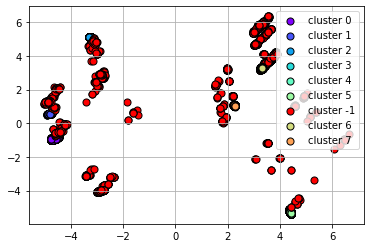

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

K_CLUSTERS = len(pca_X['cluster'].value_counts())

# colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightred', 'cyan', 'lightcyan', 'magenta', 'lightmagenta', 'yellow', 'lightyellow']
colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

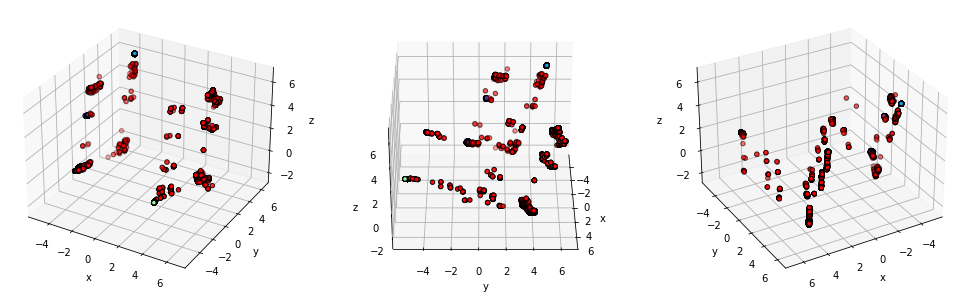

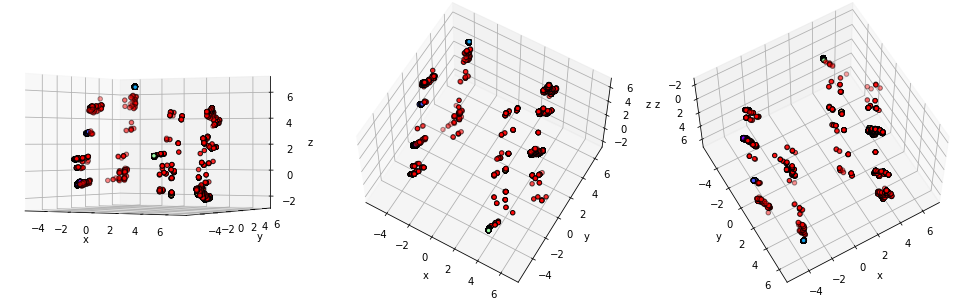

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -4.56277 -0.87605 -1.08992  0.22716 -0.06135 -0.04012  0.19875  0.35936   
1     -4.85869  0.53599  2.84526  1.97454 -0.63947 -1.78541 -1.59742 -0.05765   
2     -3.28998  5.11554  6.53932 -3.08226  0.14592  0.18939  0.88155  0.12007   
3     -4.53367 -0.87761 -0.96368 -0.00237  0.03730  0.06207  0.05899 -0.81437   
4     -4.56153 -0.82117 -0.99505  0.23320 -0.06435  0.03229 -0.06590  0.62633   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  3.65919  3.79773 -2.21047 -0.48880 -1.46134 -0.18956  0.20581  0.64315   
21564  3.66582  3.79507 -2.16879 -0.59399 -1.37303 -0.15831  0.27029  0.02444   
21565 -4.74564 -0.93969 -1.01809  0.16640  0.00458  0.07247 -0.12156 -0.67022   
21566  3.87687  4.13101 -2.09560  0.92283 -1.20071  3.67141  0.56035 -0.59322   
21567  4.41218 -5.33327  1.17325 -0.22491 -0.04765 -0.03397  0.06883 -0.72068   

             8        9       10       11       12       13       14       15  \
0     -0.45918 -0.61577  0.04099 -0.21813  0.29102  1.07453  0.09286  0.19272   
1     -0.61844  1.67851  0.00042 -0.43133  0.04206 -0.00668 -0.01660  0.15295   
2     -0.55864 -0.09843 -0.07546 -0.13883  0.04763 -0.09092  0.02084  0.02928   
3      0.26897  0.30690  0.07889  0.15681 -0.12953 -0.19619 -0.03259  0.13124   
4     -0.62848 -0.73281 -0.00328 -0.31296  0.12766 -0.49421 -0.22672  0.03524   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.26350 -0.81442  0.07121 -0.35803  0.20362  0.72160  0.14165  0.03943   
21564  0.25214 -0.28614  0.05574 -0.11731  0.07221  0.70641  0.22402 -0.14963   
21565  0.27628  0.23235  0.04966  0.22087 -0.09548 -0.42388 -0.03638 -0.03241   
21566 -1.58078  2.09727 -1.61878  1.18432 -0.26080  0.43061 -1.69899 -1.08792   
21567  0.11097  0.22839  0.00358  0.15121 -0.01498  0.13837  0.00547  0.06612   

            16       17       18       19       20       21       22       23  \
0      0.40071  0.02681 -0.01148  0.01349  0.10615 -0.07691  0.04565 -0.10057   
1     -0.11383 -0.05430  0.00960 -0.00617 -0.06311  0.01258 -0.18381  0.00620   
2      0.05703 -0.10294 -0.06644 -0.14743  0.15811 -0.03201  0.03218 -0.00269   
3      0.25507  0.05920 -0.01730  0.11120 -0.22790 -0.02471 -0.26169  0.06005   
4      0.26400  0.07272 -0.07818  0.10553 -0.15293 -0.07379 -0.57816 -0.27019   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  0.09401 -0.00409 -0.07691 -0.12427  0.13230 -0.07736  0.09656 -0.01092   
21564 -0.41578 -0.02666 -0.03447 -0.04940 -0.04894  0.03176 -0.05905  0.16112   
21565 -0.18728 -0.10181  0.05015 -0.17046  0.10394 -0.03350  0.12568  0.34090   
21566  1.24281 -0.35886  0.03735  0.10121 -0.04779  0.03278 -0.00239 -0.16028   
21567 -0.00098  0.03977  0.03722  0.07389 -0.11569  0.05179 -0.11573  0.00721   

            24       25       26       27       28       29       30       31  \
0     -0.14011 -0.19836  0.27838 -0.13029 -0.07036  0.16680 -0.01924  0.02238   
1     -0.01766  0.05798  0.36980  0.22107  0.15803 -0.14959  0.03150  0.03133   
2      0.00610 -0.00803 -0.05299  0.06331  0.01320 -0.04607  0.01631  0.01129   
3     -0.08232 -0.02992  0.30019 -0.50254 -0.07327 -0.00912 -0.04036  0.16772   
4     -0.02403 -0.06631  0.03226  0.11367 -0.01803  0.26385 -0.02264 -0.08064   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.03889 -0.08425  0.11623  0.17630  0.01455  0.09177  0.03434 -0.03724   
21564 -0.01274 -0.01077  0.10950  0.00728  0.05672 -0.30177  0.11076  0.18390   
21565 -0.12938 -0.07782  0.11199  0.33408  0.08166  0.01031  0.02101 -0.05622   
21566 -0.07902  0.13657  0.02416 -0.23825  0.03997 -0.10252 -0.13292 -0.17428   
21567  0.04129  0.10361 -0.09130  0.29492  0.06494  0.00498  0.03370 -0.06719   

            32       33       34       35       36       37       38       39  \
0      0.02246 -0.00378  0.16441 -0.0530

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0          -1     3018      tcp     ssl         SF  orig_reg_or_dyn   
1           0     7617      udp     dns         SF  orig_reg_or_dyn   
2           1      427      udp     dns         SF  orig_reg_or_dyn   
3           2     1017      tcp     ftp         SF  orig_reg_or_dyn   
4           3      326      tcp     ssl         SF  orig_reg_or_dyn   
5           4     2916      tcp     ssl         SF  orig_reg_or_dyn   
6           5     4551      udp     dns         SF  orig_reg_or_dyn   
7           6     1220      tcp    http         SF  orig_reg_or_dyn   
8           7      476      udp     ntp         SF  orig_well_known   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0   resp_443          0.46287              0.02121                0.00168   
1    resp_53          0.43934              0.00004                0.00011   
2    resp_53          0.58365              0.00004                0.00009   
3    resp_21          0.25195              0.00497                0.00014   
4   resp_443          0.55264              0.03259                0.00237   
5   resp_443          0.44023              0.03072                0.00292   
6    resp_53          0.44733              0.00011                0.00007   
7    resp_80          0.39971              0.02466                0.00104   
8   resp_123          0.46004              0.00003                0.00006   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00461                0.00237               0.00329   
1               0.00049                0.00002               0.00026   
2               0.00044                0.00002               0.00025   
3               0.00237                0.00001               0.00211   
4               0.00609                0.00249               0.00389   
5               0.00560                0.00227               0.00379   
6               0.00022                0.00001               0.00013   
7               0.00327                0.00113               0.00211   
8               0.00022                0.00000               0.00013   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.21372    0.02584     0.08449    0.30020      0.02773  
1    1.00000    0.00000     0.00000    0.00000      0.00000  
2    1.00000    0.00000     0.00000    0.00000      0.00000  
3    0.00000    0.00000     0.00000    0.00000      0.00000  
4    0.00000    0.00000     0.00000    0.99693      0.03636  
5    0.00000    0.00000     0.00000    0.98663      0.05738  
6    1.00000    0.00000     0.00000    0.00000      0.00000  
7    0.00000    0.00000     0.74918    0.00000      0.07571  
8    0.00000    0.00000     0.00000    0.00000      0.00000

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

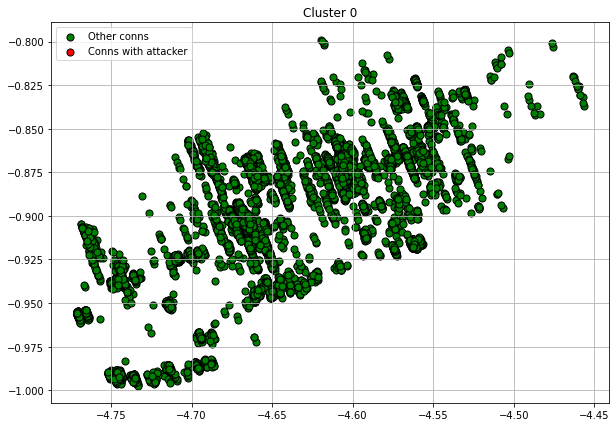

Total num of conns: 7617

Attacker conns ratio:
No    7617
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    1651
192.168.10.17    1527
192.168.10.15    1098
192.168.10.9      901
192.168.10.19     853
192.168.10.5      823
192.168.10.16     512
192.168.10.12     245
192.168.10.8        7
Name: originated_ip, dtype: int64

192.168.10.3    7617
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:13.016143Z
timestamp max = 2017-07-04T13:34:50.950977Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
15252  CDBDf04knycAOP4sa9            0.53453   192.168.10.9           0.85944   
20106  CPpp3j3rYBt9Npx0Tg            0.53453  192.168.10.17           0.85944   
16637   CJ1CuxKZM4ehD2k48            0.53453   192.168.10.5           0.85944   
1431    CLtLyEvHbGFObKJi3            0.53453  192.168.10.16           0.85944   
7649   C4pNah1JQxvBUr1wt9            0.53453  192.168.10.17           0.85944   
8270    CSrZrEQZRxM56E57h            0.53453  192.168.10.15           0.85944   
7615   CL0YJE1lQev258hnmd            0.53453  192.168.10.12           0.85944   
5595   CZjkIm1McE9VyUls9g            0.53453   192.168.10.5           0.85944   
13201   CUq6k1G4wq4SBQG86            0.53453   192.168.10.9           0.85944   
1019   C7Speb4XpazQwCisy9            0.53453   192.168.10.5           0.85944   
3660   CkICxc2jY1D2hUN6d1            0.53453   192.168.10.9           0.85944   
18844  CgNLBY1718pbQr1La4            0.53453  192.168.10.14           0.85944   
7502   CCeNki3rf4G0saqVqh            0.53453  192.168.10.17           0.85944   
5564   CLAFay48oZXl5mX63g            0.53453  192.168.10.16           0.85944   
8464   C7yYik1h66GMmM7ml6            0.53453  192.168.10.15           0.85944   

       responded_ip                    timestamp  connection.time  duration  \
15252  192.168.10.3  2017-07-04T13:23:01.547429Z          0.60099   0.00017   
20106  192.168.10.3  2017-07-04T13:31:51.967821Z          0.89573   0.00017   
16637  192.168.10.3  2017-07-04T13:22:05.485719Z          0.56984   0.06114   
1431   192.168.10.3  2017-07-04T13:06:52.669597Z          0.06261   0.00026   
7649   192.168.10.3  2017-07-04T13:31:50.604474Z          0.89497   0.00026   
8270   192.168.10.3  2017-07-04T13:17:45.035347Z          0.42511   0.00018   
7615   192.168.10.3   2017-07-04T13:06:14.16125Z          0.04121   0.28913   
5595   192.168.10.3  2017-07-04T13:22:13.428515Z          0.57425   0.00016   
13201  192.168.10.3  2017-07-04T13:13:54.010081Z          0.29674   0.00019   
1019   192.168.10.3  2017-07-04T13:19:12.897987Z          0.47393   0.00023   
3660   192.168.10.3  2017-07-04T13:22:52.851624Z          0.59616   0.00019   
18844  192.168.10.3   2017-07-04T13:08:45.57859Z          0.12535   0.05955   
7502   192.168.10.3  2017-07-04T13:28:20.491679Z          0.77822   0.00022   
5564   192.168.10.3  2017-07-04T13:23:42.117251Z          0.62353   0.02459   
8464   192.168.10.3  2017-07-04T13:14:28.372924Z          0.31583   0.03091   

       connection.duration protocol service conn_state  connection.orig_p  \
15252              0.00000      udp     dns         SF            0.81527   
20106              0.00000      udp     dns         SF            0.67402   
16637              0.00003      udp     dns         SF            0.92437   
1431               0.00000      udp     dns         SF            0.69102   
7649               0.00000      udp     dns         SF            0.76769   
8270               0.00000      udp     dns         SF            0.85855   
7615               0.00016      udp     dns         SF            0.47175   
5595               0.00000      udp     dns         SF            0.99533   
13201              0.00000      udp     dns         SF            0.75668   
1019               0.00000      udp     dns         SF            0.90647   
3660               0.00000      udp     dns         SF            0.76839   
18844              0.00003      udp     dns         SF            0.96730   
7502               0.00000      udp     dns         SF            0.98042   
5564               0.00001      udp     dns         SF            0.43516   
8464               0.00002      udp     dns         SF            0.99957   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
15252   53426  orig_reg_or_dyn                0.00009       76   
20106   44170  orig_reg_or_dyn                0.00008       70   
16637   60575  orig_reg_or_dy

Protocol:
udp    7617
Name: protocol, dtype: int64

Service:
dns    7617
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7617
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    7617
Name: resp_p_cat, dtype: int64




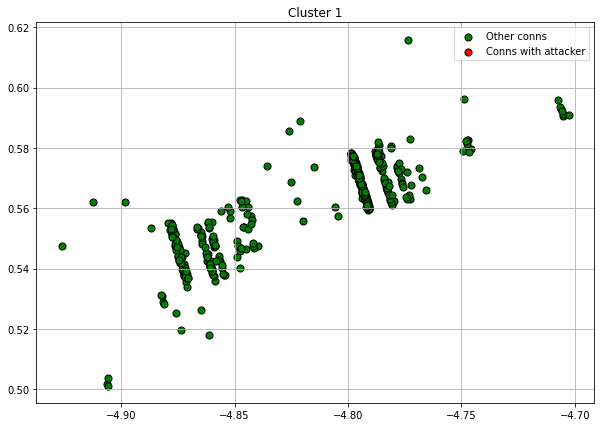

Total num of conns: 427

Attacker conns ratio:
No    427
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    251
192.168.10.51    155
192.168.10.9      17
192.168.10.14      4
Name: originated_ip, dtype: int64

192.168.10.3    427
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.396868Z
timestamp max = 2017-07-04T13:32:38.78382Z

Cluster 1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
2708   CD08dS2LdWWDPZUOwf            0.53453  192.168.10.12           0.85944   
17982   CtR8g7nZEuasMktA6            0.53453  192.168.10.12           0.85944   
2366    CrpT3o3n6u9O3Hum3            0.53453  192.168.10.51           0.85944   
9009    CmEe6vTKlsqgAPc1a            0.53453  192.168.10.12           0.85944   
2293    CxwoEOYzvoTG8Uckl            0.53453  192.168.10.12           0.85944   
19446  C7KQNy2gKu6A4CfT4h            0.53453  192.168.10.51           0.85944   
9638   CVgOIs3FZQhu6WsNc8            0.53453  192.168.10.12           0.85944   
2221   CHqp0y4OuUMovW6FF5            0.53453  192.168.10.12           0.85944   
3488   CReZgA19ziItMSPwEb            0.53453  192.168.10.51           0.85944   
10899  CATKXE1SpTqvzNqGq2            0.53453  192.168.10.12           0.85944   
8597   CjZkKT3jJUnewO18k3            0.53453  192.168.10.12           0.85944   
19390  C5ReMD4mhQzBlVN0F3            0.53453  192.168.10.51           0.85944   
7124   Cu9DOJ30oeb17EmWH3            0.53453   192.168.10.9           0.85944   
9393   CY4Vsc2ecJUk2MCiue            0.53453  192.168.10.51           0.85944   
9277   C6tcEl3v858gwbQVfh            0.53453  192.168.10.51           0.85944   

       responded_ip                    timestamp  connection.time  duration  \
2708   192.168.10.3  2017-07-04T13:27:50.259078Z          0.76142   0.00032   
17982  192.168.10.3  2017-07-04T13:27:51.423349Z          0.76207   0.04926   
2366   192.168.10.3  2017-07-04T13:15:53.713492Z          0.36325   0.00020   
9009   192.168.10.3  2017-07-04T13:27:48.953072Z          0.76069   0.04724   
2293   192.168.10.3  2017-07-04T13:27:53.127527Z          0.76301   0.00019   
19446  192.168.10.3  2017-07-04T13:15:48.281443Z          0.36023   0.00016   
9638   192.168.10.3  2017-07-04T13:27:57.815599Z          0.76562   0.05135   
2221   192.168.10.3  2017-07-04T13:27:48.288807Z          0.76032   0.07275   
3488   192.168.10.3   2017-07-04T13:15:47.19863Z          0.35963   0.00017   
10899  192.168.10.3  2017-07-04T13:27:48.959656Z          0.76070   0.02485   
8597   192.168.10.3  2017-07-04T13:27:45.832544Z          0.75896   0.00017   
19390  192.168.10.3  2017-07-04T13:14:30.047512Z          0.31676   0.00023   
7124   192.168.10.3  2017-07-04T13:05:00.934617Z          0.00052   0.00016   
9393   192.168.10.3  2017-07-04T13:15:46.587092Z          0.35929   0.06109   
9277   192.168.10.3   2017-07-04T13:15:48.89949Z          0.36058   0.06076   

       connection.duration protocol service conn_state  connection.orig_p  \
2708               0.00000      udp     dns         SF            0.99525   
17982              0.00003      udp     dns         SF            0.16460   
2366               0.00000      udp     dns         SF            0.89916   
9009               0.00003      udp     dns         SF            0.15372   
2293               0.00000      udp     dns         SF            0.47966   
19446              0.00000      udp     dns         SF            0.64438   
9638               0.00003      udp     dns         SF            0.69492   
2221               0.00004      udp     dns         SF            0.31915   
3488               0.00000      udp     dns         SF            0.04120   
10899              0.00001      udp     dns         SF            0.39295   
8597               0.00000      udp     dns         SF            0.88472   
19390              0.00000      udp     dns         SF            0.54726   
7124               0.00000      udp     dns         SF            0.93729   
9393               0.00003      udp     dns         SF            0.33688   
9277               0.00003      udp     dns         SF            0.51871   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2708    65220  orig_reg_or_dyn                0.00008       66   
17982   10789  orig_reg_or_dyn                0.00008       70   
2366    58923  orig_reg_or_dy

Protocol:
udp    427
Name: protocol, dtype: int64

Service:
dns    427
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    427
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    427
Name: resp_p_cat, dtype: int64




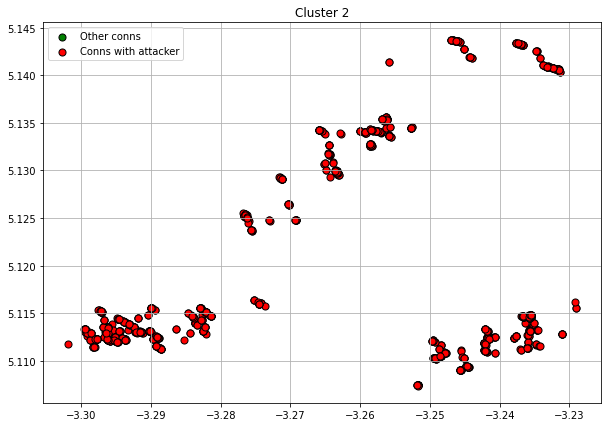

Total num of conns: 1017

Attacker conns ratio:
Yes    1017
Name: attacker_label, dtype: int64

IPs:
172.16.0.1    1017
Name: originated_ip, dtype: int64

192.168.10.50    1017
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.021444Z
timestamp max = 2017-07-04T13:20:13.627945Z

Cluster 2 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
308     CWELi75noruoGHcpd            0.00000    172.16.0.1           0.85944   
14094   CzGnw3Jd4wmIKAjOg            0.00000    172.16.0.1           0.85944   
6904   CcsbKC2Z6mbRM5xfhb            0.00000    172.16.0.1           0.85944   
835     CqDP0H8MeMw4gVTwc            0.00000    172.16.0.1           0.85944   
15260  CAYzCo1Hp7E82mK736            0.00000    172.16.0.1           0.85944   
7434   CXOixx2tG61f4AUAA9            0.00000    172.16.0.1           0.85944   
21296  CDMl2q1bg3xkYQhNxb            0.00000    172.16.0.1           0.85944   
17461  CxUVBj1KJxsrTPwbKc            0.00000    172.16.0.1           0.85944   
9438   Cobe7x3eyMAKHpADJe            0.00000    172.16.0.1           0.85944   
8082   CUNgbv1jAoCfgDD3S3            0.00000    172.16.0.1           0.85944   
15170   CaEOvR3LhNF3Mnhwu            0.00000    172.16.0.1           0.85944   
9544   C2Iven3NukY9Sx7Uh7            0.00000    172.16.0.1           0.85944   
20736  ChDC7h3YoCwgEbCPT9            0.00000    172.16.0.1           0.85944   
11638  C1iyz04Vu4yq6giQ7i            0.00000    172.16.0.1           0.85944   
11371  CB9SNK3ksHXpOckfRa            0.00000    172.16.0.1           0.85944   

        responded_ip                    timestamp  connection.time  duration  \
308    192.168.10.50  2017-07-04T13:06:03.103267Z          0.03506   8.97926   
14094  192.168.10.50  2017-07-04T13:07:28.852555Z          0.08271   8.75341   
6904   192.168.10.50  2017-07-04T13:14:31.502888Z          0.31757   8.61792   
835    192.168.10.50  2017-07-04T13:08:29.691031Z          0.11652   9.21108   
15260  192.168.10.50  2017-07-04T13:05:53.935817Z          0.02997   9.18230   
7434   192.168.10.50  2017-07-04T13:14:34.702977Z          0.31935   8.16745   
21296  192.168.10.50   2017-07-04T13:19:58.51532Z          0.49928   8.79372   
17461  192.168.10.50  2017-07-04T13:11:11.645392Z          0.20651   8.23321   
9438   192.168.10.50  2017-07-04T13:08:16.884939Z          0.10940   9.18031   
8082   192.168.10.50  2017-07-04T13:15:16.642481Z          0.34265   9.15297   
15170  192.168.10.50  2017-07-04T13:12:04.654309Z          0.23597   8.42246   
9544   192.168.10.50  2017-07-04T13:09:11.223119Z          0.13960   8.88296   
20736  192.168.10.50  2017-07-04T13:14:22.822741Z          0.31275   8.88833   
11638  192.168.10.50  2017-07-04T13:18:40.590317Z          0.45598   8.54064   
11371  192.168.10.50  2017-07-04T13:10:09.975082Z          0.17224   9.39860   

       connection.duration protocol service conn_state  connection.orig_p  \
308                0.00501      tcp     ftp         SF            0.88904   
14094              0.00489      tcp     ftp         SF            0.89197   
6904               0.00481      tcp     ftp         SF            0.90613   
835                0.00514      tcp     ftp         SF            0.89401   
15260              0.00513      tcp     ftp         SF            0.88883   
7434               0.00456      tcp     ftp         SF            0.90628   
21296              0.00491      tcp     ftp         SF            0.91736   
17461              0.00460      tcp     ftp         SF            0.89926   
9438               0.00513      tcp     ftp         SF            0.89362   
8082               0.00511      tcp     ftp         SF            0.90766   
15170              0.00470      tcp     ftp         SF            0.90107   
9544               0.00496      tcp     ftp         SF            0.89530   
20736              0.00496      tcp     ftp         SF            0.90586   
11638              0.00477      tcp     ftp         SF            0.91468   
11371              0.00525      tcp     ftp         SF            0.89716   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
308     58260  orig_reg_or_dyn                0.00016      132   
14094   58452  orig_reg_or_dyn                0.00015      124   
6904    59380  orig_reg_or_dy

Protocol:
tcp    1017
Name: protocol, dtype: int64

Service:
ftp    1017
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1017
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_21    1017
Name: resp_p_cat, dtype: int64




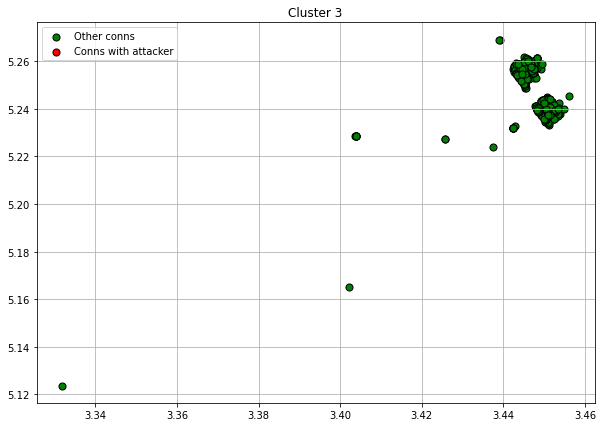

Total num of conns: 326

Attacker conns ratio:
No    326
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    166
192.168.10.51    145
192.168.10.9      13
192.168.10.14      2
Name: originated_ip, dtype: int64

162.213.33.50      17
151.101.208.69     12
62.4.0.28           9
178.239.182.230     8
172.217.11.2        8
                   ..
208.81.233.32       1
23.23.132.24        1
66.155.106.152      1
54.149.95.48        1
34.201.79.55        1
Name: responded_ip, Length: 154, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.932902Z
timestamp max = 2017-07-04T13:32:38.864003Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
13217  CoCgJY1Egq5po4hNXg            0.53453  192.168.10.51           0.86052   
4605   CdjFxq1bx1Oo8lFM4j            0.53453  192.168.10.12           0.23016   
7244    CSfiGS0kFZKc5h4S2            0.53453  192.168.10.51           0.72570   
12289  CaxK3d4jpN0Aabfc9a            0.53453  192.168.10.51           0.03213   
19452   CydOblRfDHYLOqBw7            0.53453  192.168.10.51           0.24102   
17837  CpJPix456aFcmuHcrc            0.53453  192.168.10.51           0.10058   
7366   C8ES7F1MXEbQxkl5M3            0.53453   192.168.10.9           0.80403   
10981  CdBVne1yb7BMBQOgxi            0.53453  192.168.10.51           0.77061   
10977  C5b7AL18r2RxK7U5of            0.53453  192.168.10.51           0.72570   
14100   C4KyzXaiR8eLQtNW4            0.53453  192.168.10.51           0.31875   
10396   CurieuWVmsx6HaUra            0.53453  192.168.10.51           0.30162   
8910   CmR1kB27di4WPGl4gg            0.53453  192.168.10.12           0.67441   
5304    CLBpGqICxJvlNwOwb            0.53453  192.168.10.14           0.46242   
15979  CPpd9o3I1YSHJuj7Rd            0.53453  192.168.10.51           0.31847   
19304  CPENcZ3xE0SWXE0l17            0.53453  192.168.10.12           0.85881   

         responded_ip                    timestamp  connection.time  duration  \
13217  192.229.163.25   2017-07-04T13:15:44.38814Z          0.35807 116.36623   
4605     52.84.135.92  2017-07-04T13:27:52.177508Z          0.76248 115.75650   
7244    162.213.33.50  2017-07-04T13:14:02.676102Z          0.30155   4.69127   
12289      8.43.72.27  2017-07-04T13:15:54.637107Z          0.36377 116.14243   
19452   54.192.37.158  2017-07-04T13:15:47.001321Z          0.35952 115.76059   
17837   23.111.11.222  2017-07-04T13:15:44.385641Z          0.35807   8.62754   
7366    180.76.142.12   2017-07-04T13:05:00.93664Z          0.00052  33.07468   
10981  172.217.10.130  2017-07-04T13:15:53.414587Z          0.36309   5.25996   
10977   162.213.33.50  2017-07-04T13:10:55.647289Z          0.19762   0.88367   
14100   72.21.206.141  2017-07-04T13:15:44.831081Z          0.35832  67.21601   
10396   68.67.178.252  2017-07-04T13:15:48.678552Z          0.36045   5.92613   
8910     151.101.0.68  2017-07-04T13:27:49.035313Z          0.76074 115.89087   
5304      104.31.17.3  2017-07-04T13:24:01.021823Z          0.63404 181.25075   
15979     72.5.205.24  2017-07-04T13:15:44.387328Z          0.35807   2.26890   
19304   192.132.33.27  2017-07-04T13:27:48.996344Z          0.76072 115.94966   

       connection.duration protocol service conn_state  connection.orig_p  \
13217              0.06498      tcp     ssl         SF            0.53292   
4605               0.06464      tcp     ssl         SF            0.51082   
7244               0.00262      tcp     ssl         SF            0.57218   
12289              0.06485      tcp     ssl         SF            0.84489   
19452              0.06464      tcp     ssl         SF            0.75864   
17837              0.00482      tcp     ssl         SF            0.62650   
7366               0.01847      tcp    none         SF            0.04597   
10981              0.00294      tcp     ssl         SF            0.51251   
10977              0.00049      tcp     ssl         SF            0.57209   
14100              0.03753      tcp     ssl         SF            0.71218   
10396              0.00331      tcp     ssl         SF            0.64124   
8910               0.06471      tcp     ssl         SF            0.90900   
5304               0.10121      tcp     ssl         SF            0.79540   
15979              0.00127      tcp     ssl         SF            0.69642   
19304              0.06474      tcp     ssl         SF            0.60592   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
13217   34924  orig_reg_or_dyn                0.00094      785   
4605    33476  orig_reg_or_dyn                0.00092      769 

Protocol:
tcp    326
Name: protocol, dtype: int64

Service:
ssl     325
none      1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    326
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           325
resp_well_known      1
Name: resp_p_cat, dtype: int64




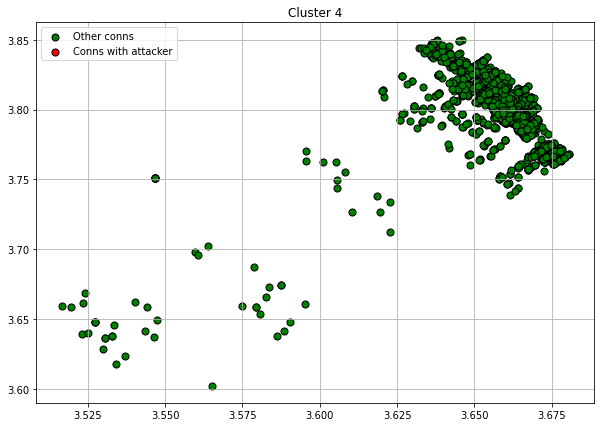

Total num of conns: 2916

Attacker conns ratio:
No    2916
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    750
192.168.10.17    742
192.168.10.5     293
192.168.10.9     292
192.168.10.15    284
192.168.10.19    250
192.168.10.16    164
192.168.10.12    139
192.168.10.8       2
Name: originated_ip, dtype: int64

173.241.242.143    44
157.240.2.25       36
172.217.12.162     33
69.172.216.111     32
8.247.89.217       32
                   ..
52.84.145.16        1
35.166.99.202       1
104.196.0.190       1
52.84.145.244       1
23.199.172.151      1
Name: responded_ip, Length: 873, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.255341Z
timestamp max = 2017-07-04T13:34:48.524557Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
7118    C1Xv99kg6UsBMhZah            0.53453  192.168.10.15           0.24191   
8      CehYDa3erVAJage5g2            0.53453   192.168.10.5           0.23016   
20493  CN2DvK1tyxLQHixyp1            0.53453  192.168.10.14           0.72561   
3470   C9avNI25SOlKgKRcH3            0.53453  192.168.10.14           0.86077   
18936  CIYsLr3cM5Rz5alp5j            0.53453  192.168.10.16           0.77061   
13921  C69nEG3tSqYCMY1fla            0.53453   192.168.10.9           0.96516   
16422  CCHbf246O7RXGQNvXe            0.53453  192.168.10.19           0.10204   
2645    CudBcIe3iCJoh1RVe            0.53453  192.168.10.15           0.62691   
10516   CLKknQ3O3wJHDJFH1            0.53453  192.168.10.17           0.77061   
20372   CF2BEFEppIzME4Rz8            0.53453  192.168.10.14           0.23207   
3640    CgsgRkJoGX484OKVi            0.53453  192.168.10.16           0.23216   
17634  CIUUqa3dGb8dBDUWp6            0.53453   192.168.10.9           0.23016   
620    CqQF9K16evg1OGY7Je            0.53453  192.168.10.16           0.77061   
1675   CyidYO1h5Eff1U1udg            0.53453  192.168.10.17           0.31874   
8153    CO6ZkgeGSee6pzZqc            0.53453   192.168.10.5           0.06052   

         responded_ip                    timestamp  connection.time  duration  \
7118    54.243.34.245  2017-07-04T13:10:57.306682Z          0.19855  61.17356   
8       52.84.145.128   2017-07-04T13:10:20.36697Z          0.17802 180.92310   
20493  162.208.20.184  2017-07-04T13:05:26.146524Z          0.01453   5.45879   
3470   192.243.232.58  2017-07-04T13:08:50.947791Z          0.12833   5.89407   
18936  172.217.10.234  2017-07-04T13:06:52.235745Z          0.06237 180.64972   
13921  216.58.219.194  2017-07-04T13:31:52.708775Z          0.89614 180.96372   
16422   23.194.140.59  2017-07-04T13:15:04.328636Z          0.33581 113.19033   
2645    140.205.61.61   2017-07-04T13:17:42.14288Z          0.42350   0.85076   
10516   172.217.10.34  2017-07-04T13:23:47.459625Z          0.62650   6.05673   
20372   52.193.38.190  2017-07-04T13:33:35.825626Z          0.95344   5.74935   
3640   52.198.132.137  2017-07-04T13:27:03.795788Z          0.73560  62.50366   
17634   52.84.141.248  2017-07-04T13:22:54.561137Z          0.59711 115.93373   
620      172.217.11.2  2017-07-04T13:23:43.053942Z          0.62405 183.30897   
1675     72.21.91.113  2017-07-04T13:23:48.225008Z          0.62693   5.27790   
8153    14.128.25.249  2017-07-04T13:10:26.821367Z          0.18161   5.60038   

       connection.duration protocol service conn_state  connection.orig_p  \
7118               0.03416      tcp     ssl         SF            0.79886   
8                  0.10102      tcp     ssl         SF            0.81590   
20493              0.00305      tcp     ssl         SF            0.78357   
3470               0.00329      tcp     ssl         SF            0.78753   
18936              0.10087      tcp     ssl         SF            0.58230   
13921              0.10105      tcp     ssl         SF            0.05396   
16422              0.06320      tcp     ssl         SF            0.77275   
2645               0.00048      tcp     ssl         SF            0.80302   
10516              0.00338      tcp     ssl         SF            0.65334   
20372              0.00321      tcp     ssl         SF            0.79740   
3640               0.03490      tcp     ssl         SF            0.60287   
17634              0.06474      tcp     ssl         SF            0.05100   
620                0.10236      tcp     ssl         SF            0.54360   
1675               0.00295      tcp     ssl         SF            0.70669   
8153               0.00313      tcp     ssl         SF            0.81658   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
7118    52351  orig_reg_or_dyn                0.00119      990   
8       53467  orig_reg_or_dyn                0.00114      945 

Protocol:
tcp    2916
Name: protocol, dtype: int64

Service:
ssl     2877
none      39
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2916
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           2875
resp_80              23
resp_well_known      12
resp_reg              6
Name: resp_p_cat, dtype: int64




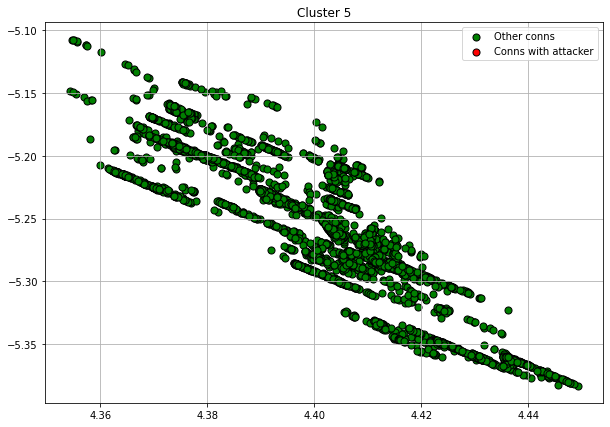

Total num of conns: 4551

Attacker conns ratio:
No    4551
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    4551
Name: originated_ip, dtype: int64

192.168.10.1    4551
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.819229Z
timestamp max = 2017-07-04T13:34:49.775231Z

Cluster 5 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
5078   CVckBA2nve8IJ3xFRc            0.53453  192.168.10.3           0.85944   
21255  CzVEoy4ElYJ8VeRsY4            0.53453  192.168.10.3           0.85944   
7170    C1vugtV1z3E9xeomf            0.53453  192.168.10.3           0.85944   
9704    CCG63hx3pgkd9Rflh            0.53453  192.168.10.3           0.85944   
13519  CS8CKi17Hs4CzOqwk8            0.53453  192.168.10.3           0.85944   
7129   CXjaCE10V0xom3bvQg            0.53453  192.168.10.3           0.85944   
13780  CA6vAJ2pxtBpPbh3Wc            0.53453  192.168.10.3           0.85944   
10196  CQ5eUe2qSdSrFEEnl3            0.53453  192.168.10.3           0.85944   
20298   Cxnsfe2Y4HujKOFr7            0.53453  192.168.10.3           0.85944   
4206   CWhAyG3851u1xYxvGa            0.53453  192.168.10.3           0.85944   
12395   C91TaND4fWZ1i21pa            0.53453  192.168.10.3           0.85944   
1408   CajEQm3KDLczLQ4OIa            0.53453  192.168.10.3           0.85944   
17108  CGcGrx3fnU27As5tSa            0.53453  192.168.10.3           0.85944   
4555   C8Cl003L6RTlTs9wQk            0.53453  192.168.10.3           0.85944   
1755   CNUzNo2TEOcPBsk2U4            0.53453  192.168.10.3           0.85944   

       responded_ip                    timestamp  connection.time  duration  \
5078   192.168.10.1  2017-07-04T13:06:13.590125Z          0.04089   0.25913   
21255  192.168.10.1  2017-07-04T13:09:20.589526Z          0.14480   0.04791   
7170   192.168.10.1  2017-07-04T13:22:52.724935Z          0.59609   0.04664   
9704   192.168.10.1   2017-07-04T13:27:49.05682Z          0.76075   0.28426   
13519  192.168.10.1  2017-07-04T13:28:21.743934Z          0.77891   0.04679   
7129   192.168.10.1  2017-07-04T13:33:27.941217Z          0.94906   0.04760   
13780  192.168.10.1    2017-07-04T13:31:02.9408Z          0.86849   0.04819   
10196  192.168.10.1  2017-07-04T13:15:54.499589Z          0.36369   0.03070   
20298  192.168.10.1  2017-07-04T13:24:38.505126Z          0.65487   0.02347   
4206   192.168.10.1  2017-07-04T13:19:09.857913Z          0.47224   0.04743   
12395  192.168.10.1  2017-07-04T13:10:44.228708Z          0.19128   0.02317   
1408   192.168.10.1  2017-07-04T13:10:11.326036Z          0.17300   0.08300   
17108  192.168.10.1  2017-07-04T13:27:14.344853Z          0.74146   0.14668   
4555   192.168.10.1  2017-07-04T13:15:51.618645Z          0.36209   0.03046   
1755   192.168.10.1  2017-07-04T13:15:09.949791Z          0.33893   0.06116   

       connection.duration protocol service conn_state  connection.orig_p  \
5078               0.00014      udp     dns         SF            0.94926   
21255              0.00003      udp     dns         SF            0.92760   
7170               0.00003      udp     dns         SF            0.92417   
9704               0.00016      udp     dns         SF            0.94955   
13519              0.00003      udp     dns         SF            0.93591   
7129               0.00003      udp     dns         SF            0.94071   
13780              0.00003      udp     dns         SF            0.93716   
10196              0.00002      udp     dns         SF            0.92293   
20298              0.00001      udp     dns         SF            0.93081   
4206               0.00003      udp     dns         SF            0.93388   
12395              0.00001      udp     dns         SF            0.93906   
1408               0.00005      udp     dns         SF            0.92988   
17108              0.00008      udp     dns         SF            0.92747   
4555               0.00002      udp     dns         SF            0.94085   
1755               0.00003      udp     dns         SF            0.92860   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
5078    62206  orig_reg_or_dyn                0.00006       46   
21255   60787  orig_reg_or_dyn                0.00007       56   
7170    60562  orig_reg_or_dyn               

Protocol:
udp    4551
Name: protocol, dtype: int64

Service:
dns    4551
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4551
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    4551
Name: resp_p_cat, dtype: int64




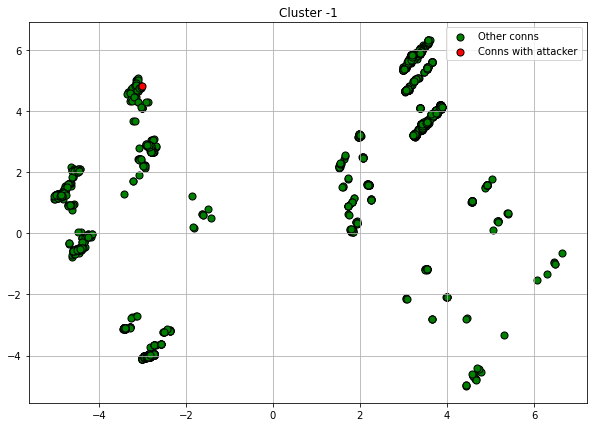

Total num of conns: 3018

Attacker conns ratio:
No     3017
Yes       1
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    761
192.168.10.50    342
192.168.10.16    280
192.168.10.14    263
192.168.10.19    255
192.168.10.15    230
192.168.10.51    203
192.168.10.12    196
192.168.10.9     181
192.168.10.17    136
192.168.10.5     105
192.168.10.8      40
192.168.10.3      23
210.151.8.24       1
172.16.0.1         1
185.49.84.72       1
Name: originated_ip, dtype: int64

192.168.10.3      747
192.168.10.50     169
192.168.10.255     70
52.84.134.210      43
162.213.33.50      42
                 ... 
151.101.44.129      1
199.59.148.12       1
195.93.42.12        1
129.146.14.97       1
218.248.240.47      1
Name: responded_ip, Length: 542, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.001203Z
timestamp max = 2017-07-04T13:34:56.111055Z

Cluster -1 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
11951  CBjKTl3HWD5gKp7E4b            0.00000    172.16.0.1           0.85944   

        responded_ip                  timestamp  connection.time  duration  \
11951  192.168.10.50  2017-07-04T13:30:03.4928Z          0.83545   5.23336   

       connection.duration protocol service conn_state  connection.orig_p  \
11951              0.00292      tcp    none         SF            0.69312   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
11951   45422  orig_reg_or_dyn                0.00000        0   

       connection.orig_pkts  connection.orig_pkts.1  connection.resp_p  \
11951               0.00087                       4            0.00120   

       r_port resp_p_cat  connection.resp_bytes  r_bytes  \
11951      80    resp_80                0.00000        0   

       connection.resp_pkts  connection.resp_pkts.1  dns_count  ssh_count  \
11951               0.00038                       3    0.00000    0.00000   

       http_count  ssl_count  files_count attacker_label victim_label  
11951     0.00000    0.00000      0.00000            Yes          Yes

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
11528  CVQ55n4BbPeZcQ2u2d            0.53453  192.168.10.12           0.85944   
13836   CbPvIBKVvZijFt5tf            0.53453   192.168.10.9           0.85944   
5319   CV8yY32zru44ARKOF5            0.53453  192.168.10.25           0.13474   
13182  CwRrj4298Y5PaTQ4d4            0.53453  192.168.10.50           0.85944   
15284  CGeRC44I2H5A1B01x9            0.53453  192.168.10.25           0.85944   
6925    C7yA7h16bpQwOyL35            0.53453  192.168.10.25           0.46358   
5259   Cgf7fJ2797vvUO3iJe            0.53453   192.168.10.3           0.85944   
16362  CtCmGr3d54jnKqpT7e            0.53453  192.168.10.50           0.85944   
18851  CHQhcV3lvknyJSSrDg            0.53453  192.168.10.15           0.10204   
2472   CcBG5D1PBoTh6vxFP4            0.53453  192.168.10.16           0.85944   
13316   CII8oCwol2SRFaf48            0.53453  192.168.10.51           0.50813   
6021    CTPuuIcikao4UJPId            0.53453  192.168.10.14           0.24161   
946    COmSfd1jmjTlKUrRu6            0.53453  192.168.10.50           0.85944   
2004   CMWjg516MsLd0dmCSj            0.53453  192.168.10.15           0.46358   
3428   CTDae92SQ3ZC07WLob            0.53453  192.168.10.15           0.15569   

         responded_ip                    timestamp  connection.time  duration  \
11528    192.168.10.3   2017-07-04T13:05:53.00062Z          0.02945   0.00042   
13836    192.168.10.3  2017-07-04T13:31:44.247861Z          0.89144   0.00014   
5319       31.13.71.7  2017-07-04T13:29:56.707045Z          0.83168   0.00000   
13182    192.168.10.3  2017-07-04T13:29:20.037428Z          0.81131   0.00020   
15284    192.168.10.3  2017-07-04T13:25:29.235809Z          0.68306   0.06278   
6925     104.97.91.19  2017-07-04T13:05:21.466281Z          0.01193   0.53540   
5259     192.168.10.1  2017-07-04T13:05:07.901501Z          0.00439   0.00000   
16362    192.168.10.3  2017-07-04T13:17:20.061187Z          0.41123   0.00026   
18851   23.194.140.29  2017-07-04T13:14:21.111415Z          0.31180   7.27682   
2472     192.168.10.3  2017-07-04T13:13:37.890838Z          0.28778   0.00031   
13316   114.80.165.63  2017-07-04T13:29:09.440784Z          0.80542   3.00000   
6021   54.225.210.102  2017-07-04T13:10:40.618755Z          0.18927   2.41696   
946      192.168.10.3  2017-07-04T13:29:20.040192Z          0.81131   0.00017   
2004   104.97.117.153  2017-07-04T13:27:46.937873Z          0.75957 115.22813   
3428    35.185.41.131  2017-07-04T13:10:59.318988Z          0.19966  65.20661   

       connection.duration protocol service conn_state  connection.orig_p  \
11528              0.00000      udp     krb         SF            0.77903   
13836              0.00000      udp    none         SF            0.85583   
5319               0.00000      tcp    none         SH            0.76784   
13182              0.00000      udp     dns         SF            0.10449   
15284              0.00004      udp     dns         SF            0.86574   
6925               0.00030      tcp     ssl         S1            0.76637   
5259               0.00000      udp     dns        SHR            0.93159   
16362              0.00000      udp     dns         SF            0.89273   
18851              0.00406      tcp     ssl       RSTO            0.80053   
2472               0.00000      udp     dns         SF            0.63645   
13316              0.00168      tcp    none         S0            0.85479   
6021               0.00135      tcp    http         SF            0.79058   
946                0.00000      udp     dns         SF            0.94727   
2004               0.06434      tcp    http         SF            0.80579   
3428               0.03641      tcp     ssl         SF            0.79955   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
11528   51051  orig_reg_or_dyn                0.00042      348   
13836   56084  orig_reg_or_dyn                0.00039      326 

Protocol:
tcp     2145
udp      871
icmp       2
Name: protocol, dtype: int64

Service:
ssl                   906
none                  883
dns                   654
http                  254
ntp                   150
ssh                    77
krb                    25
ftp-data               14
ftp                    14
krb_tcp                11
gssapi,smb,dce_rpc     10
gssapi,smb,krb          9
dce_rpc                 9
gssapi,ntlm,smb         2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2765
orig_well_known     253
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1468
resp_53             545
resp_80             453
resp_well_known     250
resp_123            150
resp_22              78
resp_reg             50
resp_21              14
resp_dyn             10
Name: resp_p_cat, dtype: int64




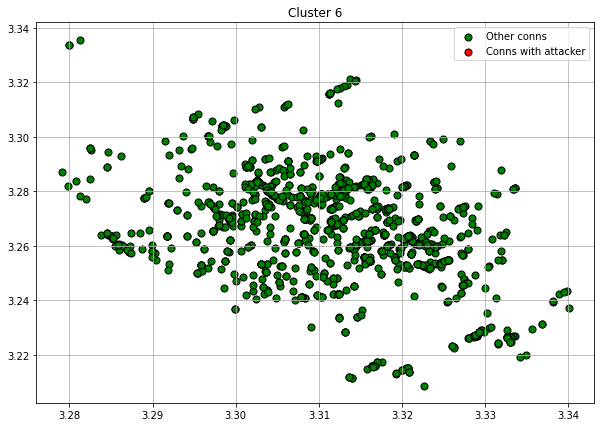

Total num of conns: 1220

Attacker conns ratio:
No    1220
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    223
192.168.10.15    193
192.168.10.14    193
192.168.10.17    162
192.168.10.16    160
192.168.10.9     126
192.168.10.5     125
192.168.10.12     38
Name: originated_ip, dtype: int64

23.50.75.27       136
178.255.83.1      111
50.63.243.230      86
72.21.91.29        85
23.61.187.27       79
                 ... 
52.52.208.254       1
151.101.2.2         1
23.0.165.27         1
104.88.70.158       1
213.174.132.64      1
Name: responded_ip, Length: 211, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:57.445752Z
timestamp max = 2017-07-04T13:33:45.611004Z

Cluster 6 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
21041   CAbUSKuMNqEMdsH4e            0.53453   192.168.10.9           0.09970   
9973   CETRtu3AowXBI80wJ7            0.53453   192.168.10.9           0.46215   
16539  Cf5p3F3wkoPaxxHu95            0.53453  192.168.10.15           0.32131   
2884   CefaNH1H78YqHYVLe8            0.53453  192.168.10.19           0.82804   
13093   CsenlS3d84MeuR2yf            0.53453  192.168.10.17           0.22083   
6405   CaMjDl3fDg35oOQZ8c            0.53453  192.168.10.17           0.09952   
17315  CG9LJQ3bQCsgIBYv51            0.53453  192.168.10.19           0.09952   
17428  CgfBUz2YPztN4Ow1Ck            0.53453  192.168.10.19           0.79819   
9830    CW4TbhWO5B1tMjEul            0.53453  192.168.10.16           0.22083   
15220   C1E2eOWLQINtSS0Jd            0.53453  192.168.10.16           0.46526   
16303  Cv1zUb4bP54xqrkWO5            0.53453   192.168.10.5           0.46215   
1149   CelGd12eRXCAVEdpW6            0.53453   192.168.10.9           0.09970   
14682  CHRVVZ39pIO9Jk4bLc            0.53453  192.168.10.17           0.09972   
7171   C9d55m3Z68XIIFSGrf            0.53453  192.168.10.17           0.79819   
3691    CO1opBaFjLCcaSAO8            0.53453  192.168.10.16           0.46215   

         responded_ip                    timestamp  connection.time  duration  \
21041    23.60.139.27  2017-07-04T13:22:52.895639Z          0.59618  39.54161   
9973    104.16.28.216   2017-07-04T13:22:54.08659Z          0.59684  47.94985   
16539  72.167.239.239   2017-07-04T13:14:24.74996Z          0.31382   0.10019   
2884   185.167.164.37  2017-07-04T13:06:09.093206Z          0.03839  15.40408   
13093   50.63.243.230  2017-07-04T13:23:50.099678Z          0.62797   5.41334   
6405      23.50.75.27  2017-07-04T13:31:52.786004Z          0.89618   5.19389   
17315     23.50.75.27  2017-07-04T13:33:03.450854Z          0.93545  23.82536   
17428    178.255.83.1  2017-07-04T13:15:09.439774Z          0.33865   0.07406   
9830    50.63.243.230  2017-07-04T13:06:53.670695Z          0.06316   0.17223   
15220  104.193.88.102  2017-07-04T13:23:47.524742Z          0.62654   0.18816   
16303   104.16.26.216  2017-07-04T13:13:15.165423Z          0.27515  46.53262   
1149     23.60.139.27  2017-07-04T13:22:52.895738Z          0.59618 114.12366   
14682    23.61.187.27  2017-07-04T13:28:22.455444Z          0.77931  42.79243   
7171     178.255.83.1  2017-07-04T13:28:22.299737Z          0.77922   0.05368   
3691     104.16.35.83  2017-07-04T13:23:48.542098Z          0.62710  46.12971   

       connection.duration protocol service conn_state  connection.orig_p  \
21041              0.02208      tcp    http         SF            0.05009   
9973               0.02677      tcp    http         SF            0.05076   
16539              0.00006      tcp    http         SF            0.80094   
2884               0.00860      tcp    http         SF            0.80005   
13093              0.00302      tcp    none         SF            0.88405   
6405               0.00290      tcp    none         SF            0.84216   
17315              0.01330      tcp    http         SF            0.50664   
17428              0.00004      tcp    http         SF            0.51242   
9830               0.00010      tcp    http         SF            0.55886   
15220              0.00011      tcp    http         SF            0.53136   
16303              0.02598      tcp    http         SF            0.81744   
1149               0.06372      tcp    http         SF            0.05010   
14682              0.02389      tcp    http         SF            0.87238   
7171               0.00003      tcp    http         SF            0.89537   
3691               0.02576      tcp    http         SF            0.70906   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
21041    3285  orig_reg_or_dyn                0.00155     1290   
9973     3329  orig_reg_or_dyn                0.00167     1389 

Protocol:
tcp    1220
Name: protocol, dtype: int64

Service:
http    912
none    308
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1220
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    1220
Name: resp_p_cat, dtype: int64




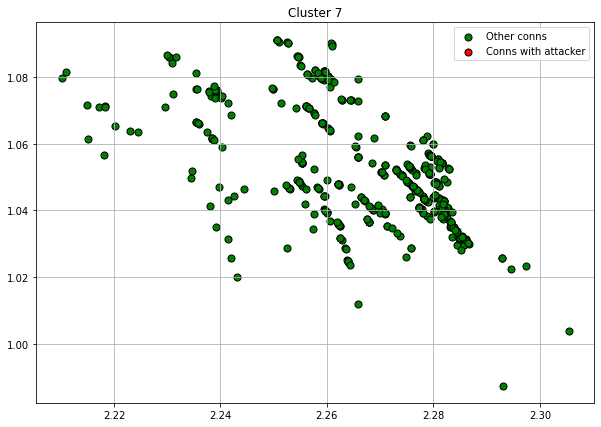

Total num of conns: 476

Attacker conns ratio:
No    476
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    255
192.168.10.19    172
192.168.10.16     32
192.168.10.12     17
Name: originated_ip, dtype: int64

91.189.89.198      31
66.228.59.187      24
96.244.96.19       23
91.189.89.199      23
132.163.4.102      22
91.189.91.157      22
108.61.73.244      22
216.218.254.202    14
45.76.92.117       14
216.229.4.69       13
66.135.44.92       13
209.242.224.117    13
204.2.134.164      13
216.6.2.70         13
198.58.105.63      13
66.228.42.59       13
128.138.141.172    13
198.58.110.84      13
74.208.174.96      13
45.33.91.95        10
198.50.139.209     10
45.33.84.208       10
74.104.167.114      9
144.217.164.10      9
129.6.15.28         9
138.68.46.177       9
52.60.76.61         9
132.163.4.101       9
144.217.163.175     9
66.220.10.2         9
144.217.109.67      9
144.217.95.60       8
69.89.207.99        8
158.69.125.231      7
144.217.148.73      5
128.100.100.1

uid  originated_ip_num  originated_ip  responded_ip_num  \
3410   CUDytY1wVsG6cw4i3c            0.53453  192.168.10.19           0.29532   
732    CA5k4w4GMKyAfdxlT9            0.53453  192.168.10.17           0.19863   
8406   C3FwSh1bUjZ8Z6s904            0.53453  192.168.10.17           0.88443   
8450   CleU8e13i1CnUfxJr3            0.53453  192.168.10.19           0.19788   
20469  CZL4xm4hU7CED9yWtf            0.53453  192.168.10.17           0.43028   
3999   C1eeVd4OnjlGAbIfc4            0.53453  192.168.10.17           0.93699   
9817   CdVEqv3oSi7YxEkEb4            0.53453  192.168.10.19           0.59029   
7332   Cco5OB2pu42CuoBzv7            0.53453  192.168.10.19           0.59029   
12382   Cufkxbc9QxZLOjqEj            0.53453  192.168.10.17           0.43028   
4987    CSrkfUVd2LobDu654            0.53453  192.168.10.17           0.96796   
3893   Cz22iK3SftYwYteaD2            0.53453  192.168.10.19           0.40689   
3942   C9qDUH1LyPBxZirZC1            0.53453  192.168.10.17           0.59029   
17376  CgXcrU26hA3Y2mFid2            0.53453  192.168.10.17           0.93699   
3083   C2jLyS2JG8EfB2cD46            0.53453  192.168.10.19           0.22974   
13777  CnMcZ22R1qDybvOjK9            0.53453  192.168.10.17           0.40689   

          responded_ip                    timestamp  connection.time  \
3410       66.220.10.2  2017-07-04T13:11:36.612271Z          0.22039   
732       45.76.92.117  2017-07-04T13:34:16.546957Z          0.97607   
8406     198.58.110.84  2017-07-04T13:16:02.546116Z          0.36816   
8450       45.33.91.95  2017-07-04T13:10:48.612224Z          0.19371   
20469     96.244.96.19  2017-07-04T13:27:55.546536Z          0.76436   
3999   209.242.224.117  2017-07-04T13:07:27.546148Z          0.08199   
9817     132.163.4.102  2017-07-04T13:31:47.612803Z          0.89331   
7332     132.163.4.102  2017-07-04T13:16:26.612416Z          0.38153   
12382     96.244.96.19  2017-07-04T13:34:29.546948Z          0.98329   
4987   216.218.254.202  2017-07-04T13:25:34.546379Z          0.68601   
3893     91.189.89.198  2017-07-04T13:06:43.612113Z          0.05757   
3942     132.163.4.102  2017-07-04T13:08:08.546099Z          0.10477   
17376  209.242.224.117  2017-07-04T13:20:37.546218Z          0.52097   
3083       52.60.76.61  2017-07-04T13:17:51.612427Z          0.42877   
13777    91.189.91.157  2017-07-04T13:21:11.546225Z          0.53986   

       duration  connection.duration protocol service conn_state  \
3410    0.08103              0.00005      udp     ntp         SF   
732     0.11159              0.00006      udp     ntp         SF   
8406    0.05756              0.00003      udp     ntp         SF   
8450    0.02385              0.00001      udp     ntp         SF   
20469   0.03125              0.00002      udp     ntp         SF   
3999    0.03735              0.00002      udp     ntp         SF   
9817    0.05883              0.00003      udp     ntp         SF   
7332    0.05893              0.00003      udp     ntp         SF   
12382   0.03301              0.00002      udp     ntp         SF   
4987    0.08117              0.00005      udp     ntp         SF   
3893    0.09421              0.00005      udp     ntp         SF   
3942    0.05870              0.00003      udp     ntp         SF   
17376   0.03741              0.00002      udp     ntp         SF   
3083    0.02993              0.00002      udp     ntp         SF   
13777   0.03661              0.00002      udp     ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
3410             0.00183     123  orig_well_known                0.00006   
732              0.00183     123  orig_well_known                0.00006   
8406             0.00183     123  orig_well_known                0.00006   
8450             0.00183     123  orig_well_known                0.00006   
20469            0.00183     123  orig_well_known                0.00006   
3999             0.00183   

Protocol:
udp    476
Name: protocol, dtype: int64

Service:
ntp    476
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    476
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123    476
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.77728              0.00022            0.85888   
1              0.35974              0.00002            0.99165   
2              0.44102              0.00460            0.91379   
3              0.01200              0.00003            0.89566   
4              0.86823              0.00000            0.75398   
...                ...                  ...                ...   
21563          0.88272              0.00304            0.74657   
21564          0.41590              0.00309            0.75313   
21565          0.17790              0.00003            0.96351   
21566          0.19891              0.00617            0.79398   
21567          0.14984              0.00001            0.92266   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.00007               0.00043            0.00074   
1                    0.00011               0.00043            0.00074   
2                    0.00016               0.00239            0.00019   
3                    0.00010               0.00043            0.00074   
4                    0.00010               0.00043            0.00074   
...                      ...                   ...                ...   
21563                0.00072               0.00195            0.00742   
21564                0.00041               0.00239            0.00742   
21565                0.00016               0.00087            0.00074   
21566                0.00149               0.00195            0.00742   
21567                0.00006               0.00022            0.00074   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00004               0.00025    1.00000    0.00000   
1                    0.00003               0.00025    1.00000    0.00000   
2                    0.00001               0.00213    0.00000    0.00000   
3                    0.00002               0.00025    1.00000    0.00000   
4                    0.00002               0.00025    1.00000    0.00000   
...                      ...                   ...        ...        ...   
21563                0.00001               0.00075    0.00000    0.00000   
21564                0.00037               0.00088    0.00000    0.00000   
21565                0.00002               0.00025    1.00000    0.00000   
21566                0.00026               0.00100    0.00000    0.00000   
21567                0.00001               0.00013    1.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    0.00000      0.00000                           1   
1         0.00000    0.00000      0.00000                           1   
2         0.00000    0.00000      0.00000                           1   
3         0.00000    0.00000      0.00000                           1   
4         0.00000    0.00000      0.00000                           1   
...           ...        ...          ...                         ...   
21563     0.00000    1.00000      0.00000                           1   
21564     0.00000    1.00000      0.07407                           1   
21565     0.00000    0.00000      0.00000                           1   
21566     0.00000    1.00000      0.07407                           1   
21567     0.00000    0.00000      0.00000                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   1   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
2

## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 8
Estimated number of noise points: 3018
Silhouette Coefficient: 0.629


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

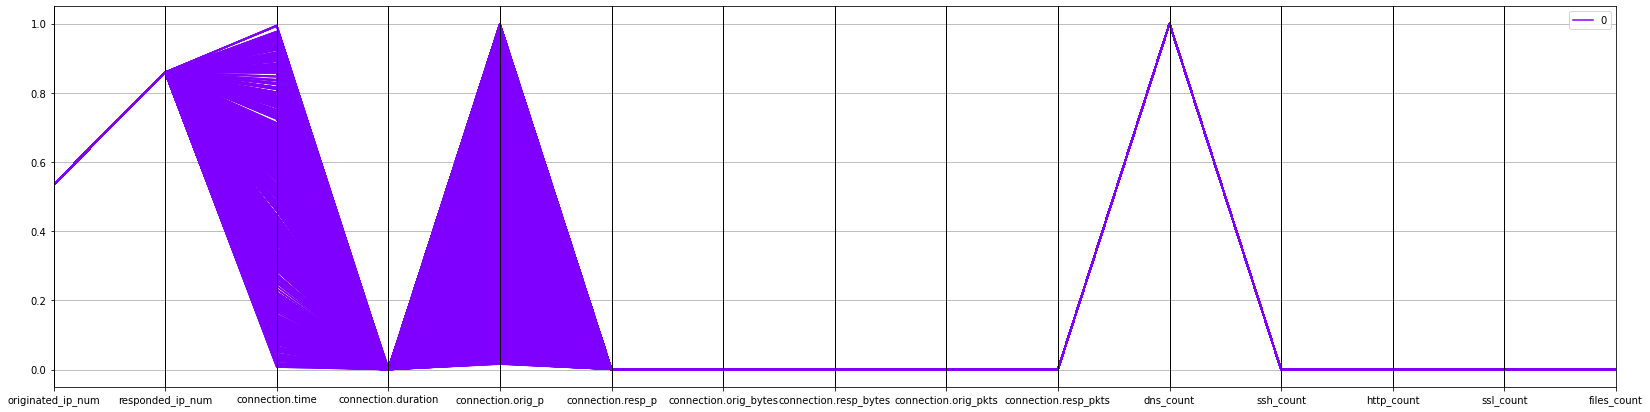

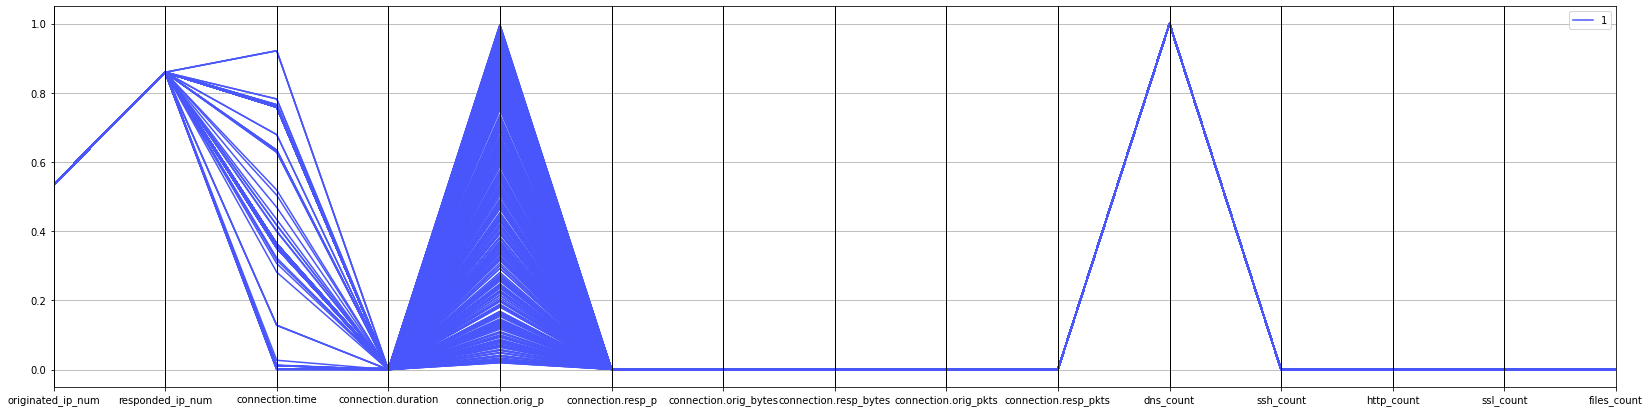

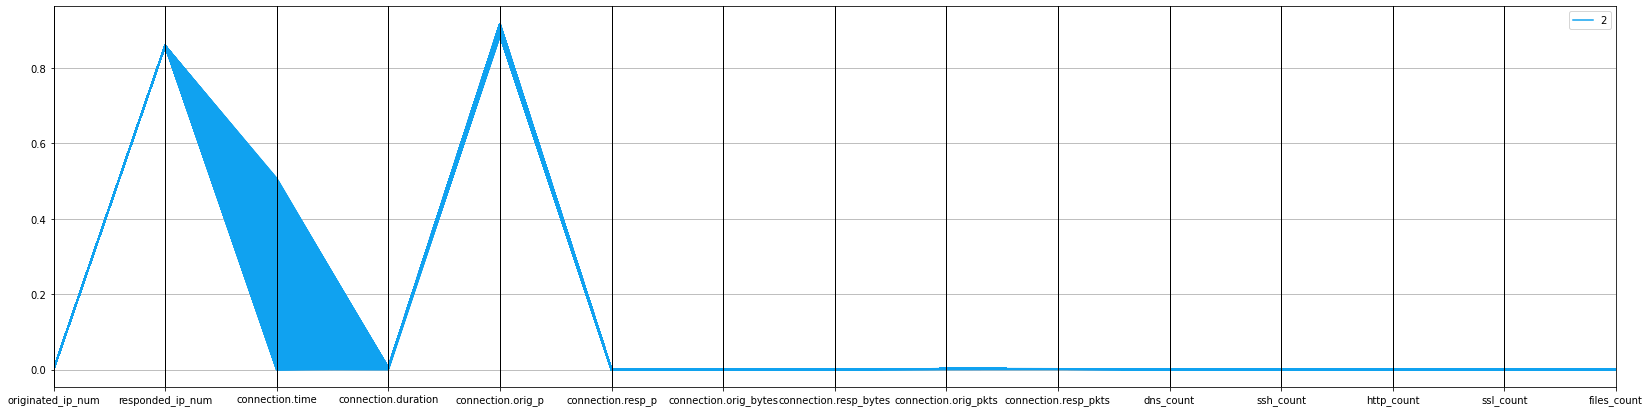

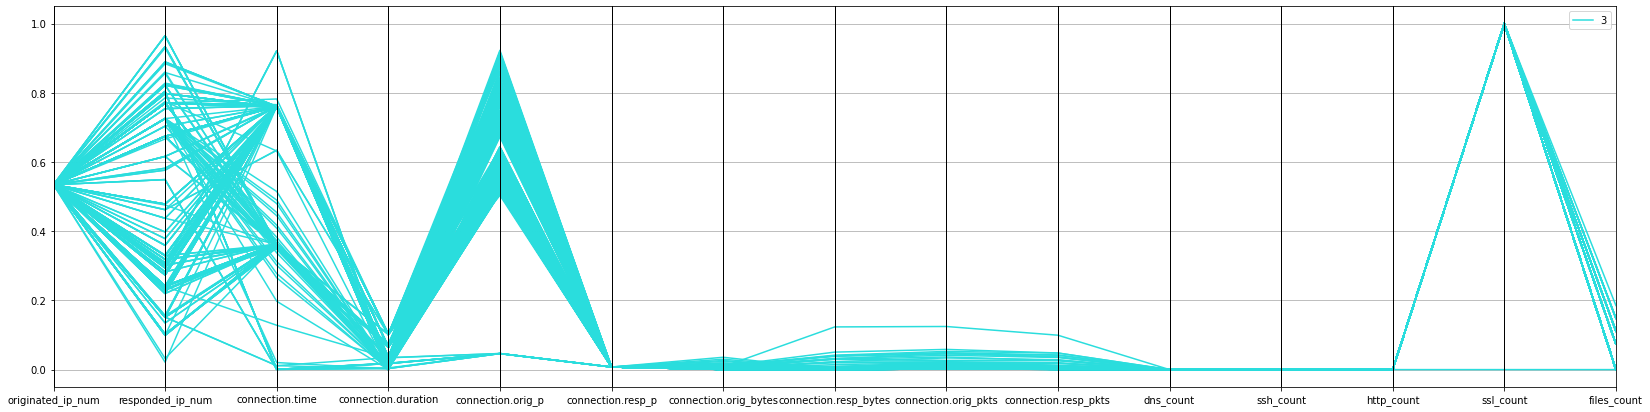

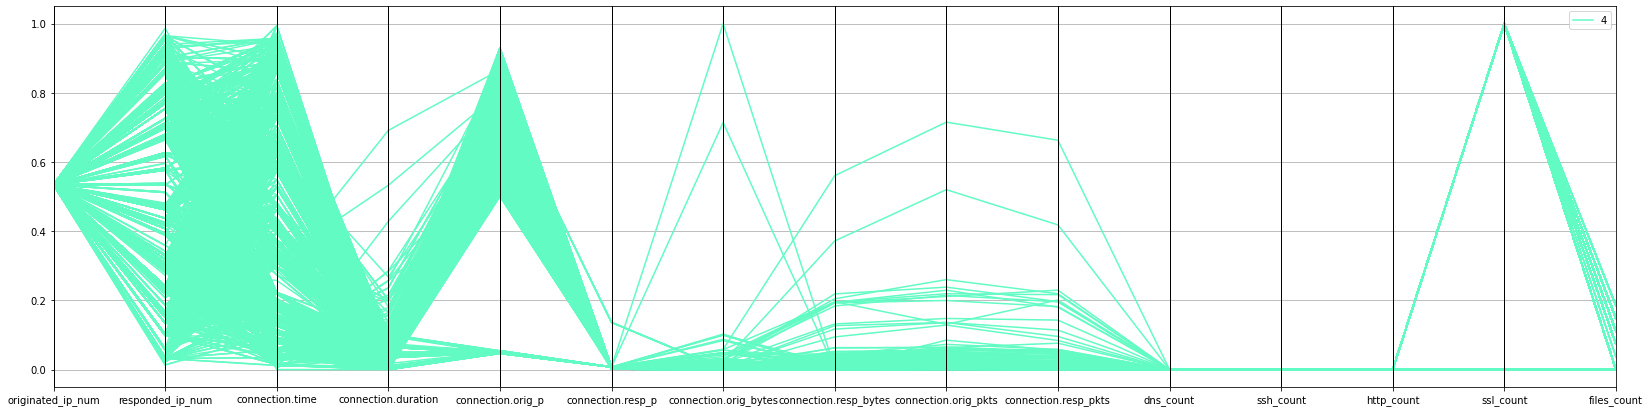

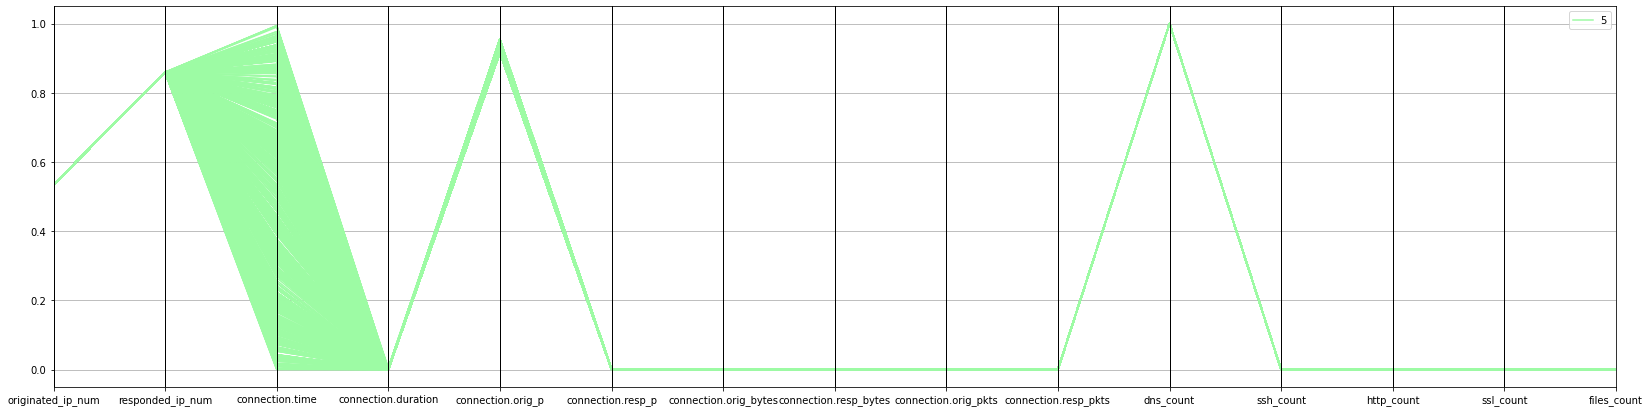

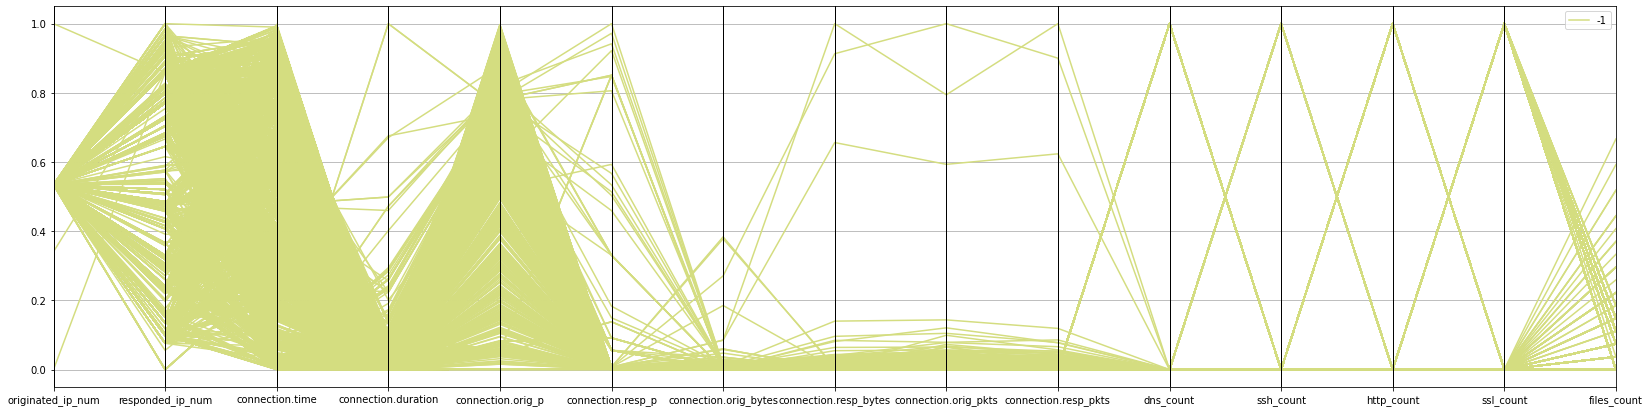

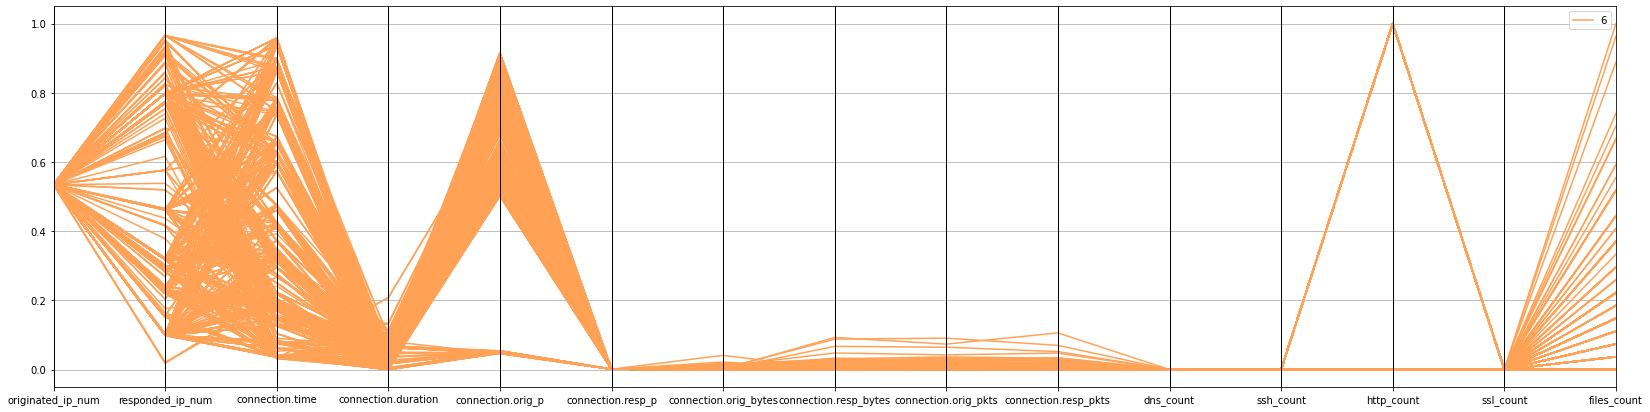

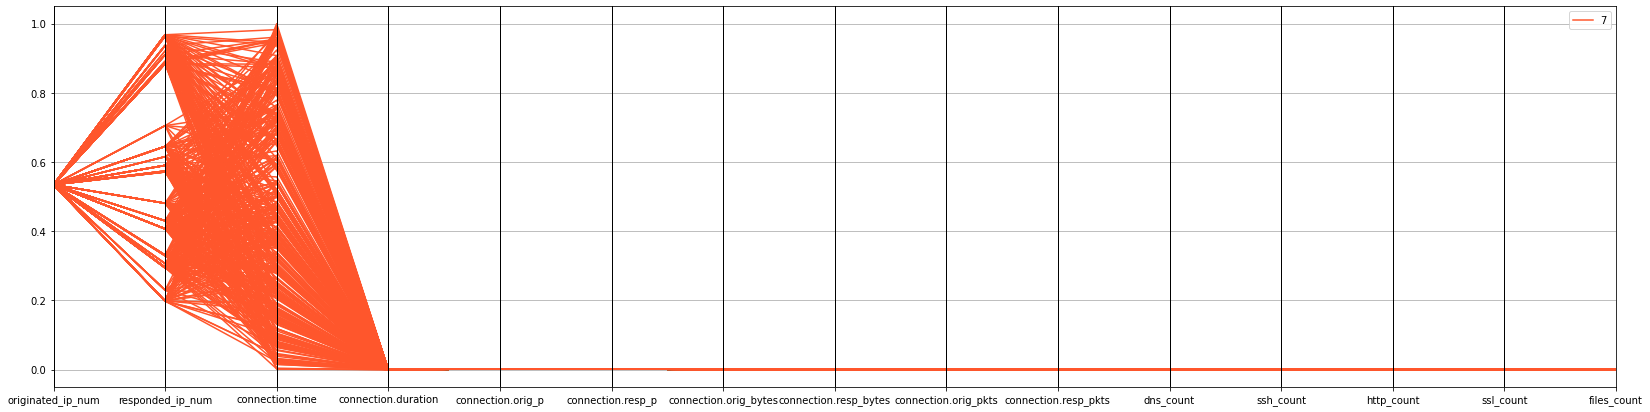

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

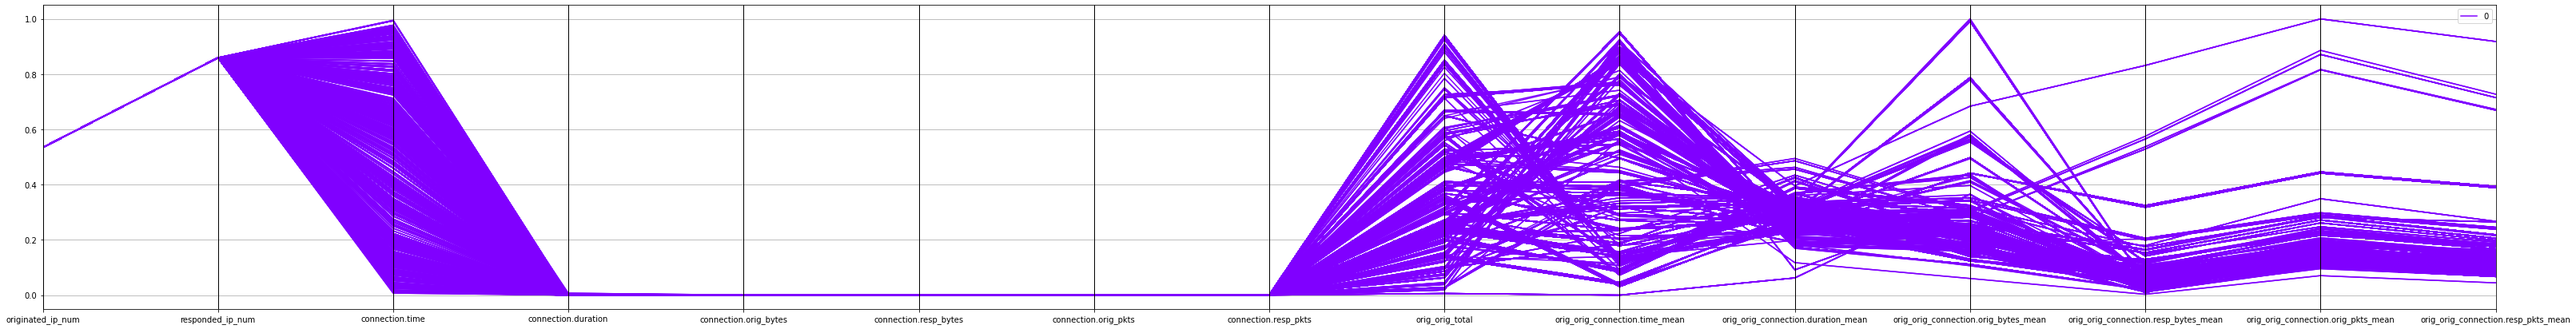

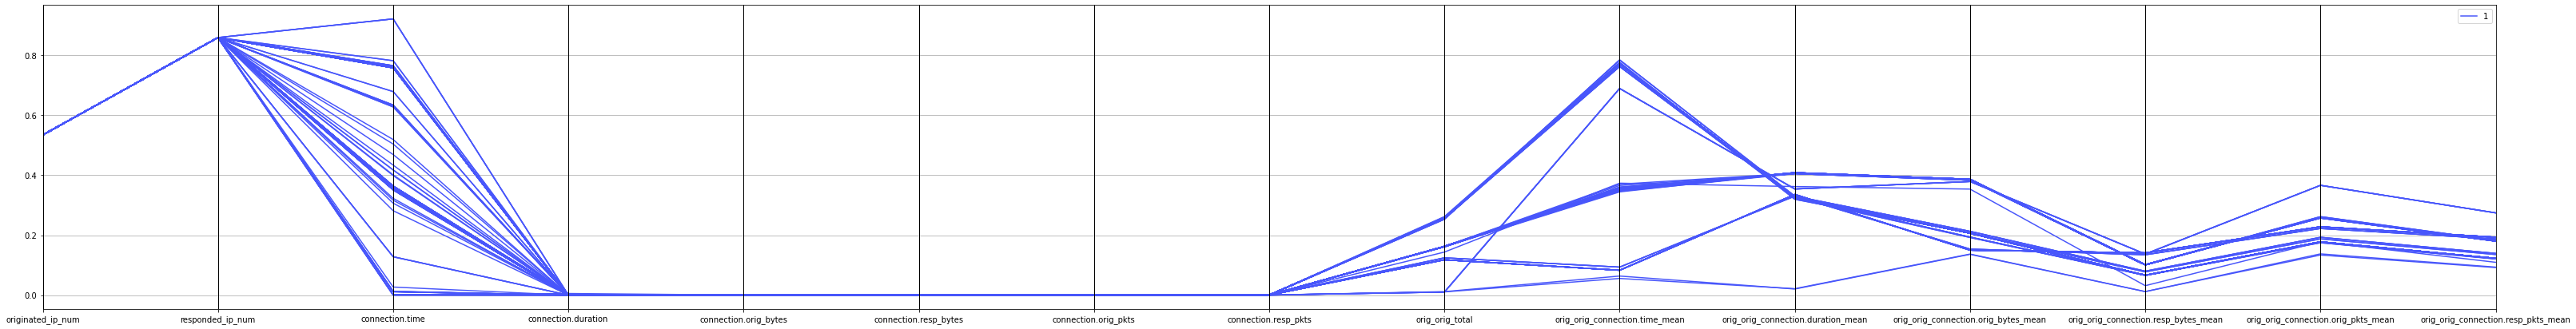

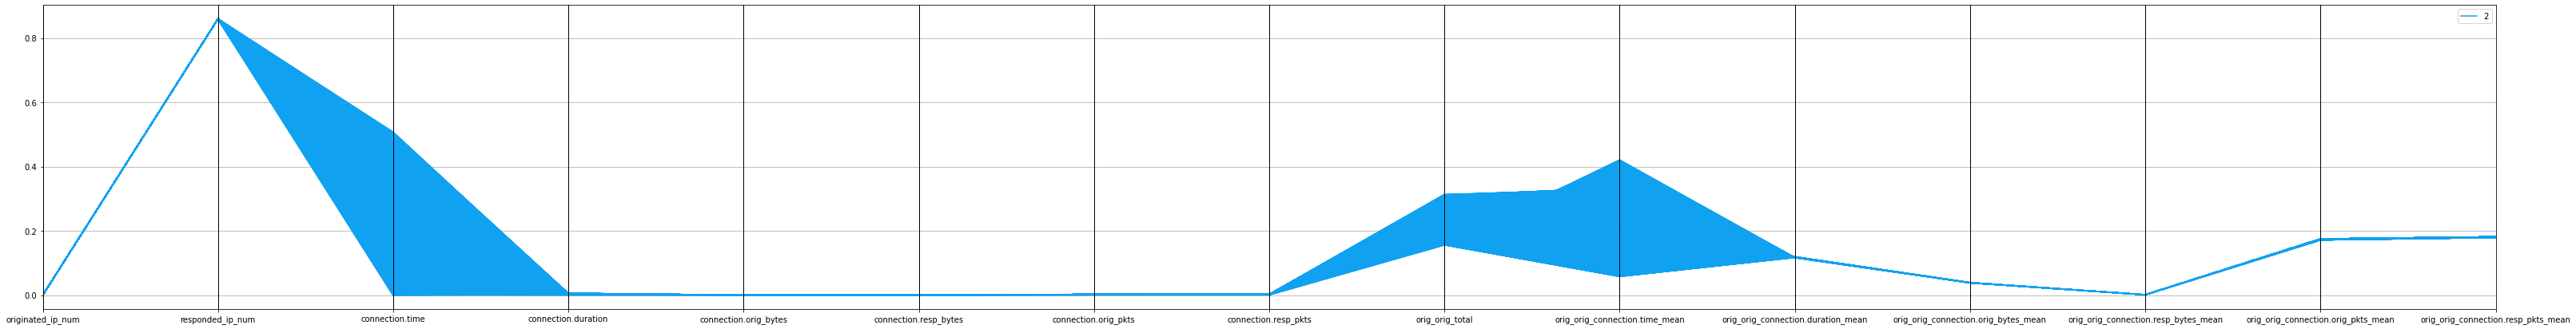

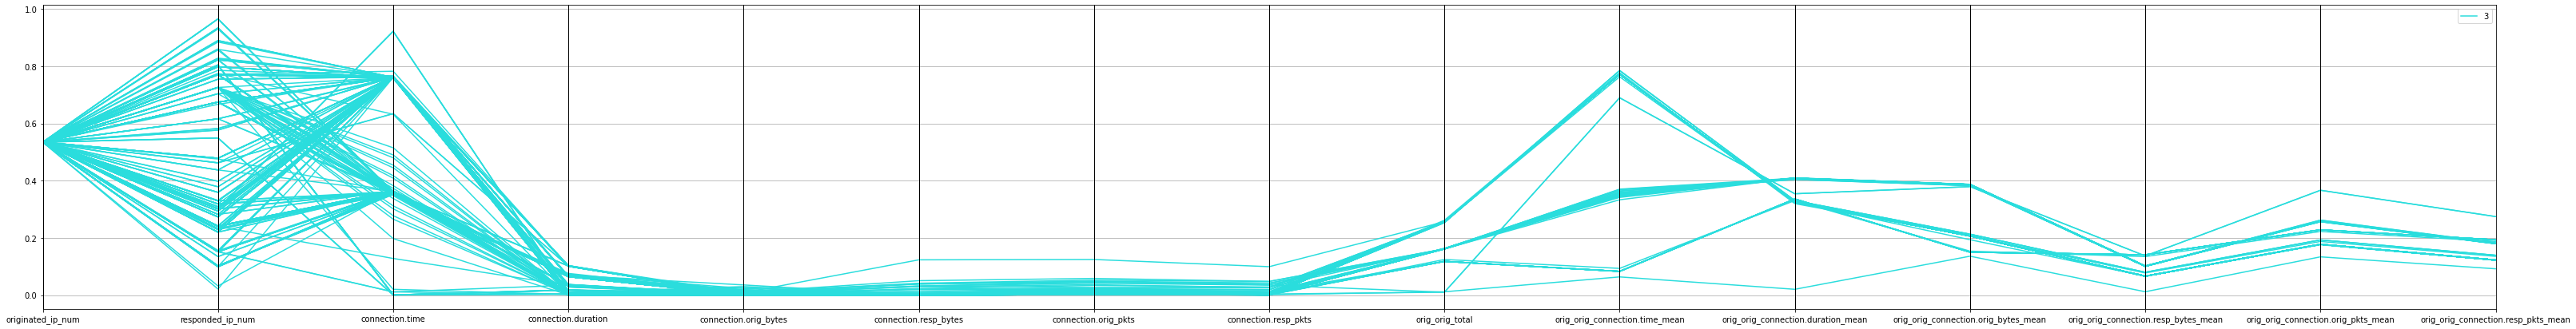

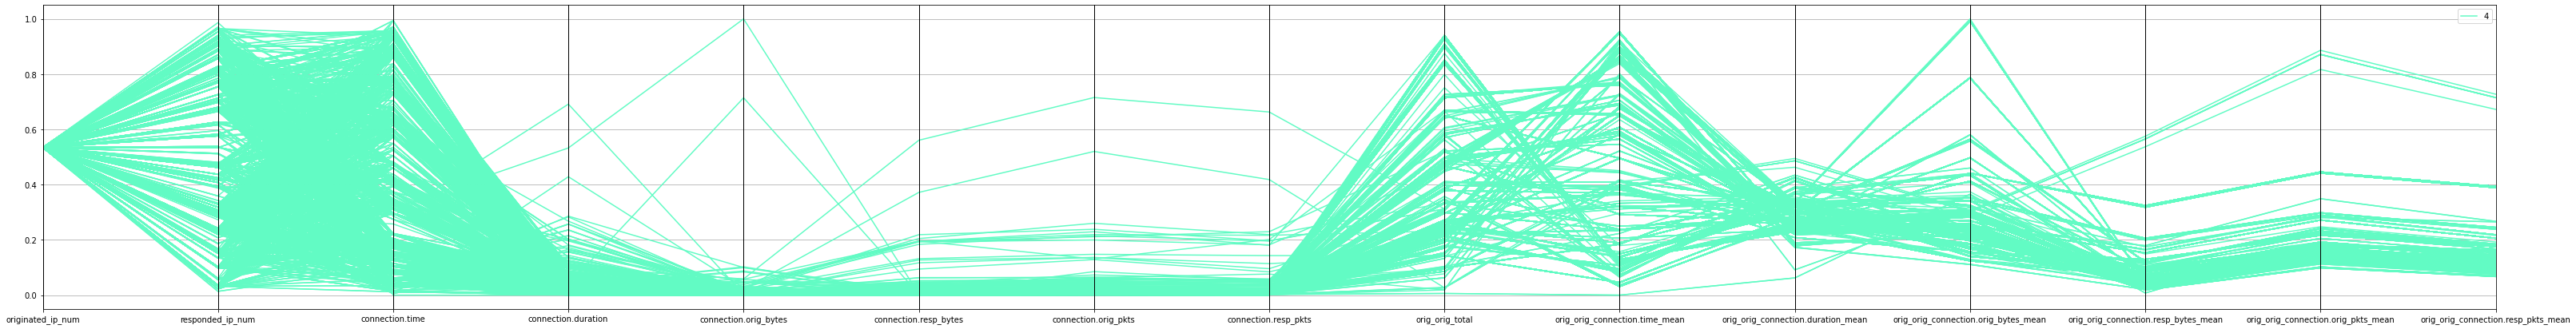

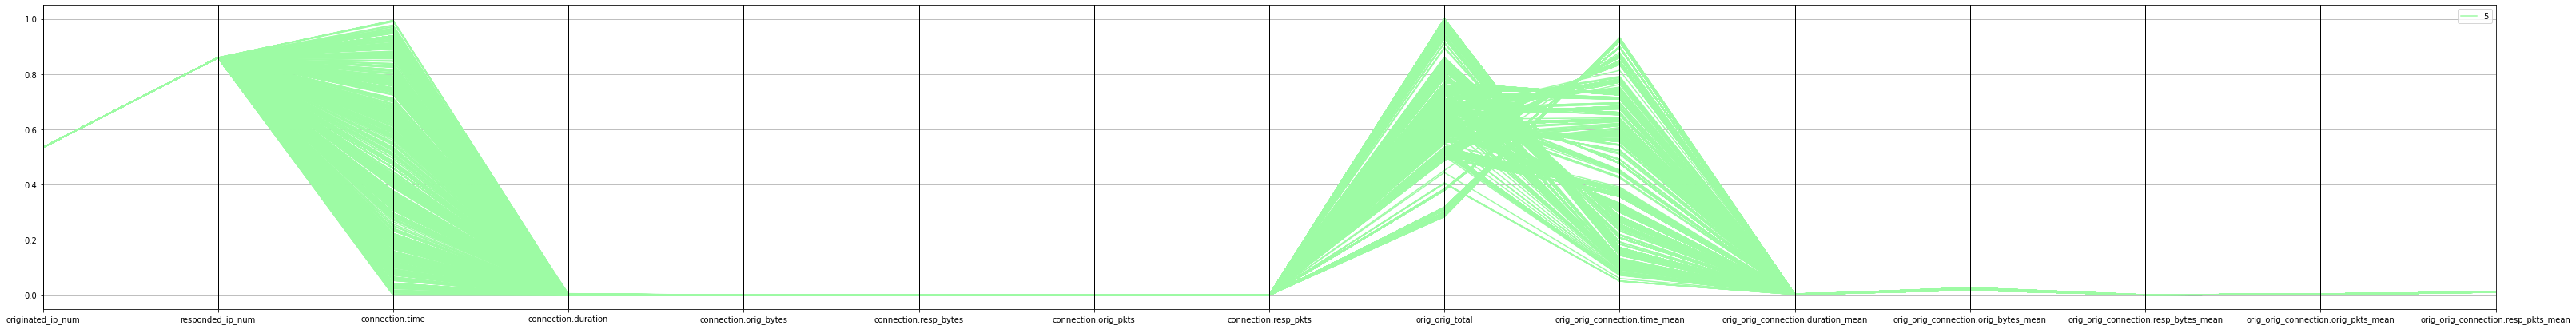

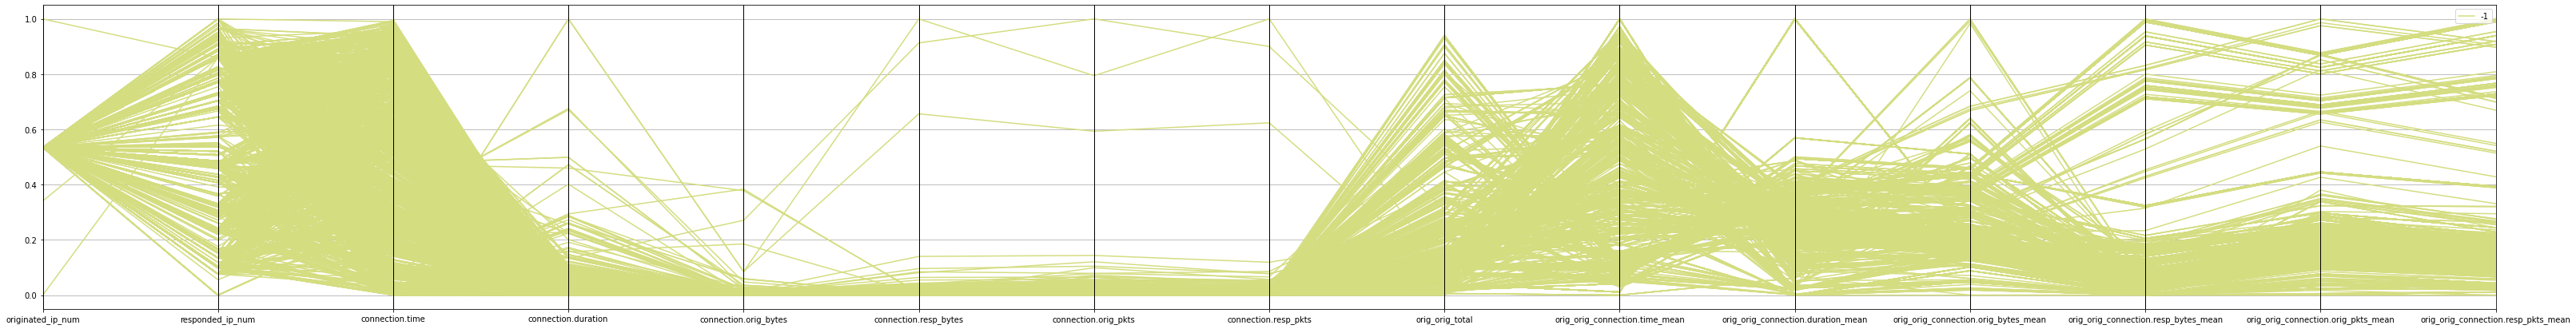

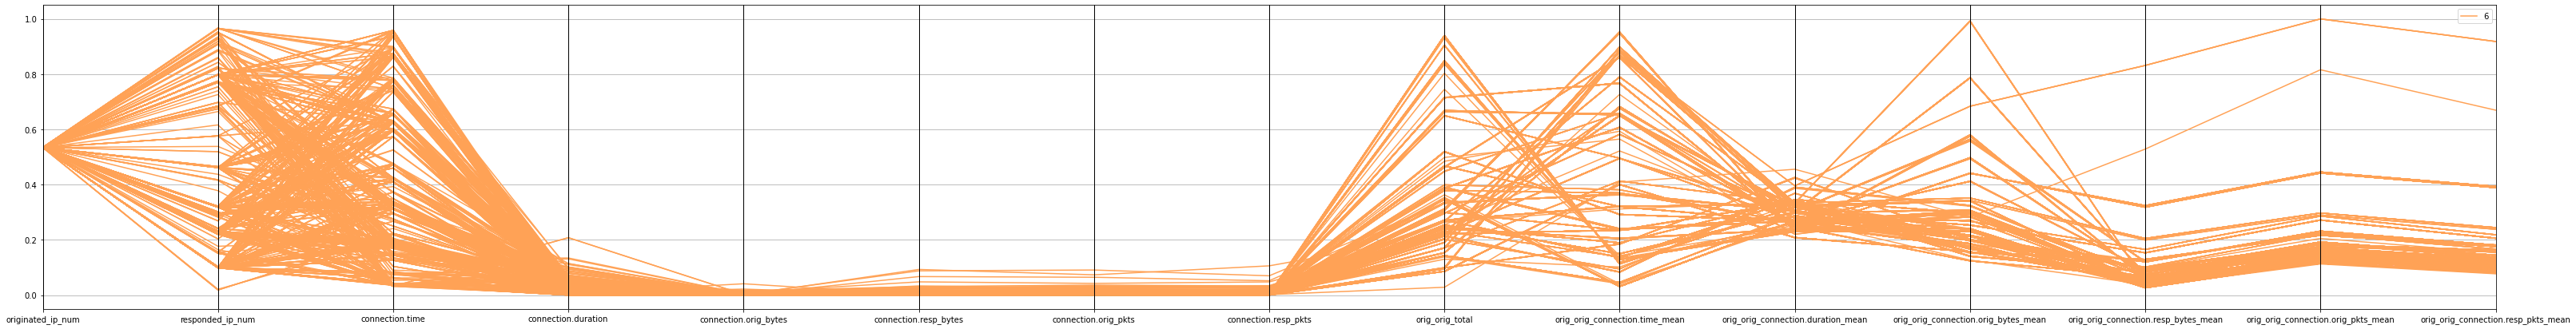

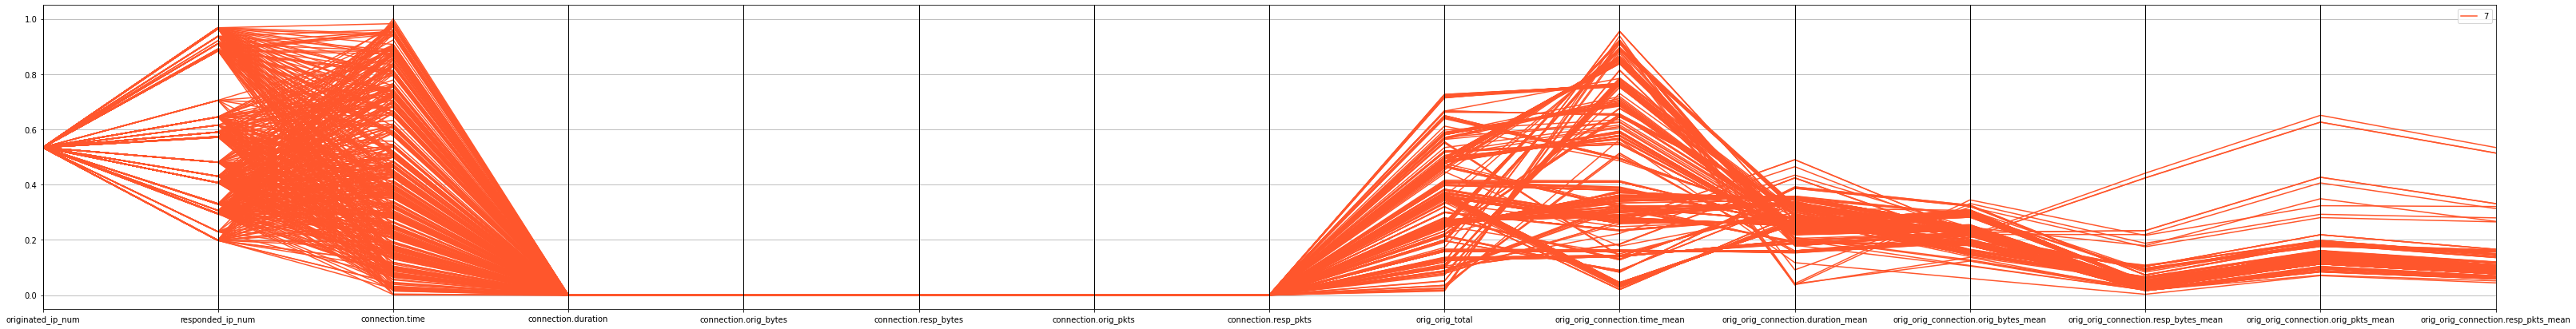

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()